## Housing Prediction
### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


### Technical Requirements:
    
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets

In [1]:
# Importing basic libraries to start work on dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading house price train dataset

ds = pd.read_csv('hp_train.csv')

In [3]:
# Top contents on train dataset

ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


Observations:
    
    1) Train dataset contains nan values. Initially we will replace the nan values with the information given in description file.
    
    2) Then we will look for other missing values and replace it with suitable data.

In [4]:
# Checking shape of house price train data
ds.shape

(1168, 81)

In [5]:
# Checking datatpyes info of train dataset and no of columns in each datatype.

ds.info()
ds.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

object     43
int64      35
float64     3
dtype: int64

Observations:
    
    1) There are 43 columns with datatype of object.
    
    2) 35 columns are of int64 datatype.
    
    3) 3 columns are of float64 datatype.

In [6]:
# Checking null values in dataset by decreasing order
ds.isnull().sum().sort_values(ascending=False)/len(ds)

PoolQC          0.994007
MiscFeature     0.962329
Alley           0.934075
Fence           0.797089
FireplaceQu     0.471747
                  ...   
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
Id              0.000000
Length: 81, dtype: float64

In [7]:
# loop for checking unique values in each column of dataset

for i in ds.columns:
    j= ds[i].nunique()
    print('Unique values in column',i,'=',j)

Unique values in column Id = 1168
Unique values in column MSSubClass = 15
Unique values in column MSZoning = 5
Unique values in column LotFrontage = 106
Unique values in column LotArea = 892
Unique values in column Street = 2
Unique values in column Alley = 2
Unique values in column LotShape = 4
Unique values in column LandContour = 4
Unique values in column Utilities = 1
Unique values in column LotConfig = 5
Unique values in column LandSlope = 3
Unique values in column Neighborhood = 25
Unique values in column Condition1 = 9
Unique values in column Condition2 = 8
Unique values in column BldgType = 5
Unique values in column HouseStyle = 8
Unique values in column OverallQual = 10
Unique values in column OverallCond = 9
Unique values in column YearBuilt = 110
Unique values in column YearRemodAdd = 61
Unique values in column RoofStyle = 6
Unique values in column RoofMatl = 8
Unique values in column Exterior1st = 14
Unique values in column Exterior2nd = 15
Unique values in column MasVnrTyp

### HANDLING MISSING VALUES BY DATA GIVEN IN DESCRIPTION

In [8]:
# As per given information, NA means No Pool. Let's replace NAs with 'No_Pool'
ds['PoolQC'].fillna('No_Pool',inplace=True)

print(ds['PoolQC'].value_counts())

No_Pool    1161
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64


In [9]:
# As per given information, NA means None. Let's replace NAs with 'None'
ds['MiscFeature'].fillna('None',inplace=True)

print(ds['MiscFeature'].value_counts())

None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64


In [10]:
# As per given information, NA means No alley access. Let's replace NAs with 'Noalleyaccess'
ds['Alley'].fillna('Noalleyaccess',inplace=True)

print(ds['Alley'].value_counts())

Noalleyaccess    1091
Grvl               41
Pave               36
Name: Alley, dtype: int64


In [11]:
# As per given information, NA means No Fence. Let's replace NAs with 'NoFence'
ds['Fence'].fillna('NoFence',inplace=True)

print(ds['Fence'].value_counts())

NoFence    931
MnPrv      129
GdPrv       51
GdWo        47
MnWw        10
Name: Fence, dtype: int64


In [12]:
# As per given information, NA means No Fireplace. Let's replace NAs with 'NoFireplace'
ds['FireplaceQu'].fillna('NoFireplace',inplace=True)

print(ds['FireplaceQu'].value_counts())

NoFireplace    551
Gd             301
TA             252
Fa              25
Ex              21
Po              18
Name: FireplaceQu, dtype: int64


In [13]:
# There are 5 different columns in which no basement feature is present. Lets replace it with nobasement
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

# Loop for replacing na values.
for i in basement:
    ds[i].fillna('nobasement',inplace=True)
    print(ds[i].value_counts())
    print('\n')

TA            517
Gd            498
Ex             94
nobasement     30
Fa             29
Name: BsmtQual, dtype: int64


TA            1041
Gd              56
Fa              39
nobasement      30
Po               2
Name: BsmtCond, dtype: int64


No            756
Av            180
Gd            108
Mn             93
nobasement     31
Name: BsmtExposure, dtype: int64


Unf           345
GLQ           330
ALQ           174
BLQ           121
Rec           109
LwQ            59
nobasement     30
Name: BsmtFinType1, dtype: int64


Unf           1002
Rec             43
LwQ             40
nobasement      31
BLQ             24
ALQ             16
GLQ             12
Name: BsmtFinType2, dtype: int64




In [14]:
# There are 4 different columns in which no gurage feature is present. Lets replace it with nogarage
garage=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in garage:
    ds[i].fillna('nogarage',inplace=True)
    print(ds[i].value_counts())
    print('\n')

Attchd      691
Detchd      314
BuiltIn      70
nogarage     64
Basment      16
CarPort       8
2Types        5
Name: GarageType, dtype: int64


Unf         487
RFn         339
Fin         278
nogarage     64
Name: GarageFinish, dtype: int64


TA          1050
nogarage      64
Fa            39
Gd            11
Ex             2
Po             2
Name: GarageQual, dtype: int64


TA          1061
nogarage      64
Fa            28
Gd             8
Po             6
Ex             1
Name: GarageCond, dtype: int64




In [15]:
# Gaining information on train dataset from describe function.
ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observations:
    
    1) There are lot of outliers in dataset.(observation from 75 percentile and max value)
    
    2) The dataset have lot of skewness.(observation from mean and standard deviation)
    
    3) Also there are few missing values in dataset.

In [16]:
# checking unique values in all columns of train dataset

i = ds.columns

for i in i:
    print('Unique values in column',i,'=',ds[i].unique())
    print('\n')
    print('------------------------------------------------------------------------------------------------------------------')

Unique values in column Id = [127 889 793 ... 196  31 617]


------------------------------------------------------------------------------------------------------------------
Unique values in column MSSubClass = [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]


------------------------------------------------------------------------------------------------------------------
Unique values in column MSZoning = ['RL' 'RM' 'FV' 'RH' 'C (all)']


------------------------------------------------------------------------------------------------------------------
Unique values in column LotFrontage = [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130. 

### HANDLING MISSING VALUES OF OTHER COLUMNS 

In [17]:
# Replacing nan values with mode and median

ds['LotFrontage']=ds['LotFrontage'].fillna(ds['LotFrontage'].mode()[0])
ds['GarageYrBlt']=ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mode()[0])
ds['MasVnrType']=ds['MasVnrType'].fillna(ds['MasVnrType'].mode()[0])
ds['MasVnrArea']=ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())

In [18]:
# cross varifying dataset for any other missing values.
ds.isnull().sum().sort_values(ascending=False)/len(ds)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
FireplaceQu     0.0
Id              0.0
Length: 81, dtype: float64

In [19]:
# Dropping id and utilities column as it is not useful to gain some insights from dataset.
ds.drop(['Id','Utilities'],axis=1,inplace=True)

### Now there are no null values in our dataset

In [20]:
# Rechecking shape of dataset
ds.shape

(1168, 79)

In [21]:
# Finding columns which are object and numerical datatype 

num_vars = ds.columns[ds.dtypes != 'object']
cat_vars = ds.columns[ds.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Centra

### UNIVARIATE ANALYSIS

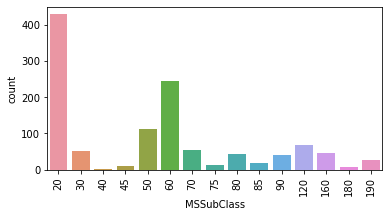

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


In [22]:
# Analysing column MSSubClass

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('MSSubClass', data = ds)
plt.show()

print(ds['MSSubClass'].value_counts())

Observations:
    
    1) There are 428 houses  of 1-Story 1946 & newer all style for sale.
    
    2) The second highest sale is of 2-Story 1946 & newer houses. It counts to 244 in number.
    
    3) The lowest number of houses for sale is of 1-story w/finished attic all ages.

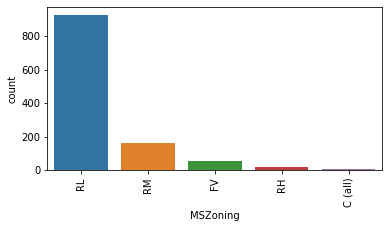

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


In [23]:
# Analysing column MSZoning

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('MSZoning', data = ds)
plt.show()

print(ds['MSZoning'].value_counts())

Observations:
    
    1) The houses in Residential Low Density are highest in sale of houses.
    
    2) The houses in Residential Medium Density are second highest in sale of houses.
    
    3) The commertial property houses are least in sale.

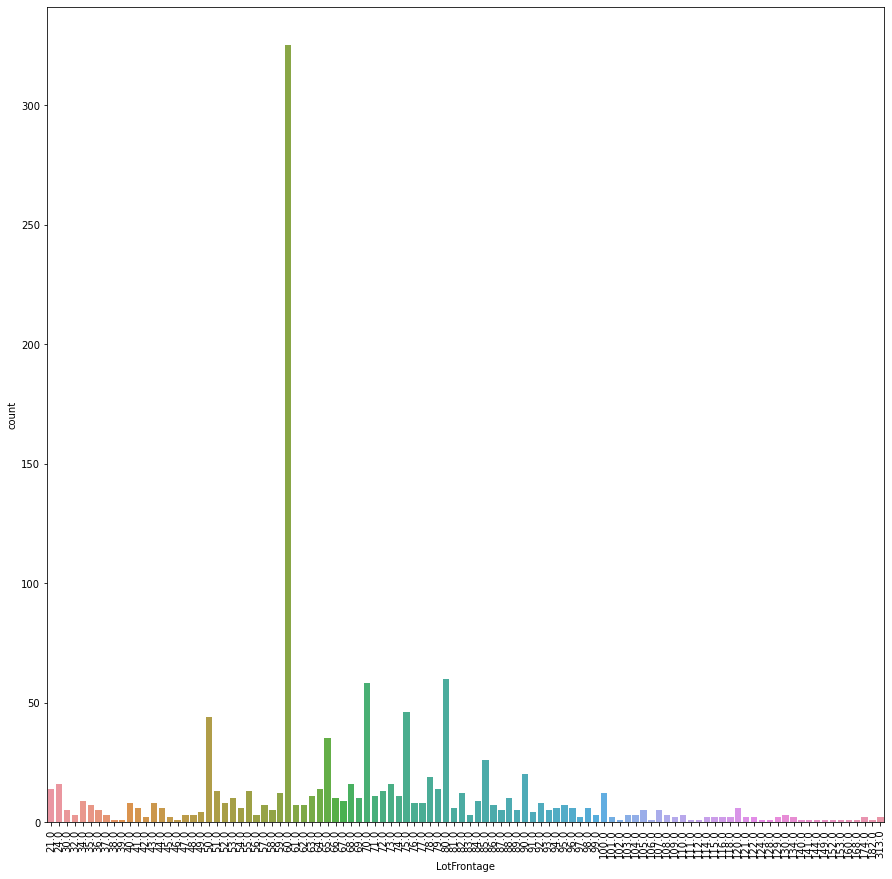

60.0     325
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
168.0      1
38.0       1
140.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64


In [24]:
# Analysing column LotFrontage

plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot('LotFrontage', data = ds)
plt.show()

print(ds['LotFrontage'].value_counts())

Observations:
    
    1) The houses with 60 feet of street connectivity have more sale. It counts to 325.
    
    2) The houses with 149 feet of street connectivity are less in sale.

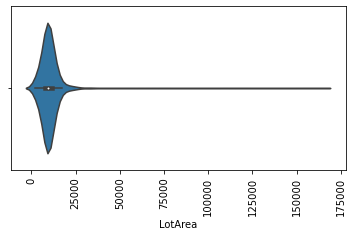

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64


In [25]:
# Analysing column LotArea

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.violinplot(ds['LotArea'])
plt.show()

print(ds['LotArea'].value_counts())

Observations:
    
    1) Most of the property have the lot area b/w 9600 and 13000.

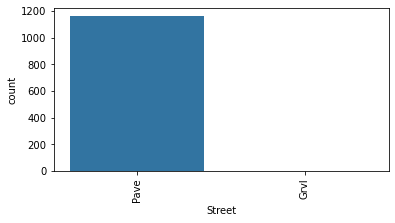

Pave    1164
Grvl       4
Name: Street, dtype: int64


In [26]:
# Analysing column Street

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Street', data = ds)
plt.show()

print(ds['Street'].value_counts())

Observations:
    
    1) Most of the houses have paved street
    
    2) Only 4 houses have garvel street.

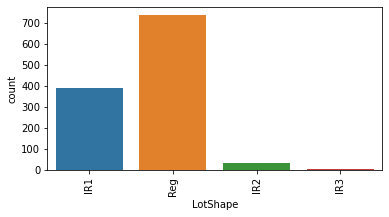

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


In [27]:
# Analysing column LotShape

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('LotShape', data = ds)
plt.show()

print(ds['LotShape'].value_counts())

Observations:

    1) Most of the houses are in regular shape.

    2) Slightly irregular shaped houses are 390 in number.
    
    3) Irregular shaped houses are least in number.

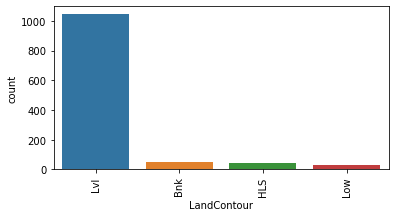

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


In [28]:
# Analysing column LandContour

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('LandContour', data = ds)
plt.show()

print(ds['LandContour'].value_counts())

Observations:
    
    1) Most of the houses have Near Flat/Level land
    
    2) There are 50 houses which are banked.
    
    3) There are 30 houses which are near Depression. These are the least in count.

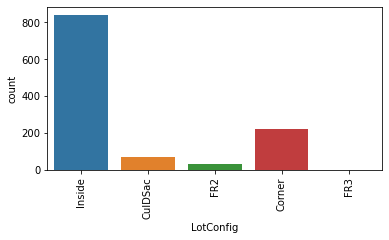

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


In [29]:
# Analysing column LotConfig

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('LotConfig', data = ds)
plt.show()

print(ds['LotConfig'].value_counts())

Observations:

    1) Most of the houses are inside lot configuration. They are 842 in count. 

    2) There are 222 houses which are located at corner.

    3) There are 2 houses which have Frontage on 3 sides of property.

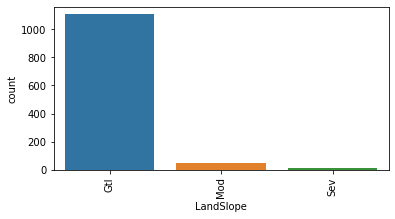

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


In [30]:
# Analysing column LandSlope

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('LandSlope', data = ds)
plt.show()

print(ds['LandSlope'].value_counts())

Observations:

    1) Most of the houses have gentle slope. They are 1105 in number. 

    2) second most of the houses have moderate slope. They are 51 in number.

    3) There are 12 houses which have severe slope.

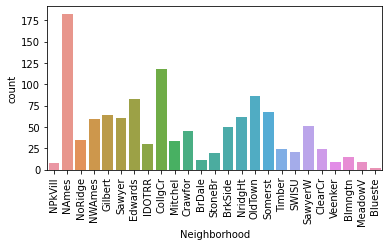

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


In [31]:
# Analysing column Neighborhood

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Neighborhood', data = ds)
plt.show()

print(ds['Neighborhood'].value_counts())

Observations:

    1) Most of the houses are near Northwest Ames. They are 182 in number. 

    2) second most of the houses are near College Creek. They are 118 in number.

    3) There are 2 houses are near Bluestem. They are least in number.

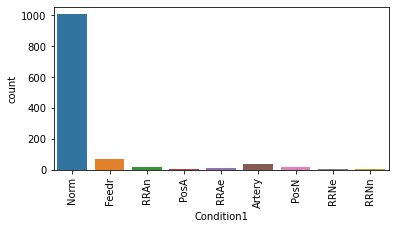

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


In [32]:
# Analysing column Condition1

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Condition1', data = ds)
plt.show()

print(ds['Condition1'].value_counts())

Observations:

    1) Most of the houses are in normal condition. They are 1005 in number. 

    2) Second most number of the houses are adjacent to feeder street. They are 67 in number.

    3) There are only 2 houses are near 200' of North-South Railroad. They are least in number.

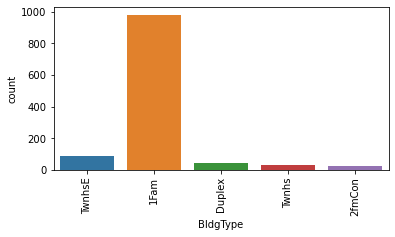

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


In [33]:
# Analysing column BldgType

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BldgType', data = ds)
plt.show()

print(ds['BldgType'].value_counts())

Observations:

    1) Most of the houses are Single-family Detached. They are 981 in number. 

    2) Second most number of the houses are Townhouse End Unit. They are 90 in number.

    3) There are only 27 houses are of Two-family type. They are least in number.

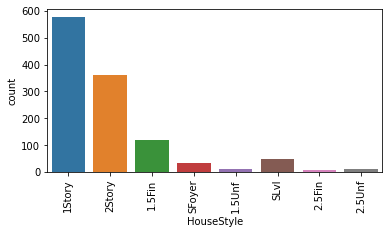

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


In [34]:
# Analysing column HouseStyle

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('HouseStyle', data = ds)
plt.show()

print(ds['HouseStyle'].value_counts())

Observations:

    1) Most of the houses are single story. They are 578 in number. 

    2) Second most number of the houses are two story. They are 361 in number.

    3) There are only 7 houses are of Two and one-half story whose 2nd level finished. They are least in number.

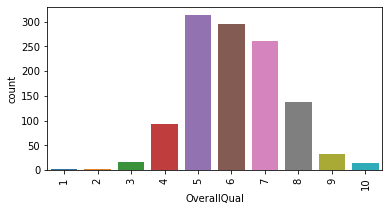

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


In [35]:
# Analysing column OverallQual

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('OverallQual', data = ds)
plt.show()

print(ds['OverallQual'].value_counts())

Observations:

    1) The houses whose overall material and finish is average are more.They are 314 in number. 

    2) Second most number of the houses whose overall material and finish are above average. They are 295 in number.

    3) There is only 1 house whose overall material and finish is very poor.

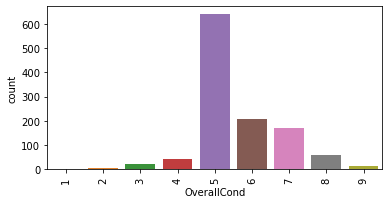

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


In [36]:
# Analysing column OverallCond

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('OverallCond', data = ds)
plt.show()

print(ds['OverallCond'].value_counts())

Observations:

    1) The houses whose overall condition are average are more.They are 640 in number. 

    2) Second most number of the houses whose overall condition are above average. They are 209 in number.

    3) There is only 1 house whose overall condition is very poor.

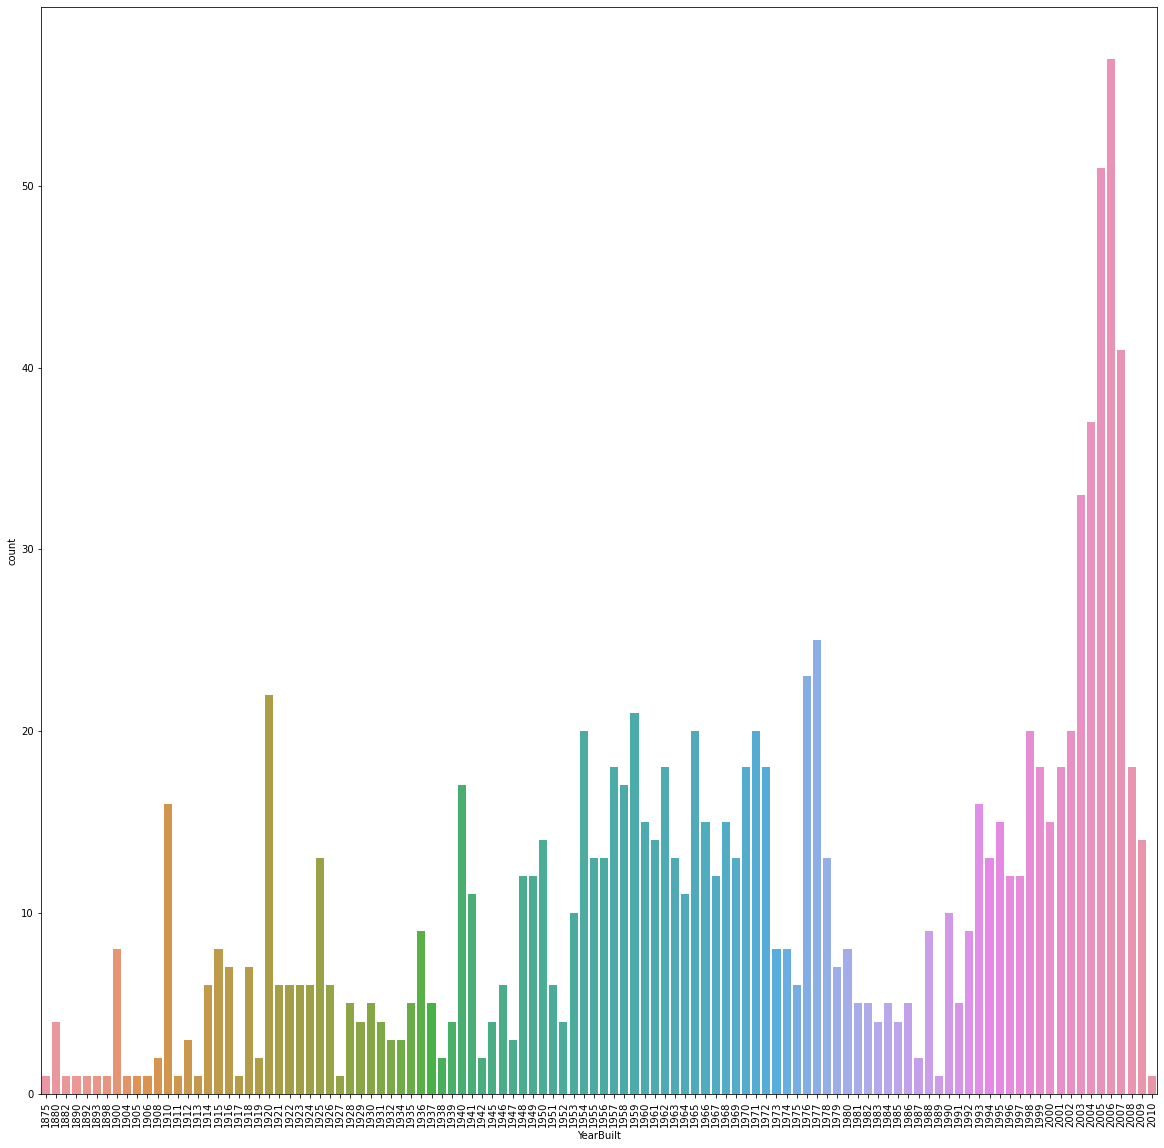

2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1913     1
1917     1
1927     1
1989     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64


In [37]:
# Analysing column YearBuilt

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot('YearBuilt', data = ds)
plt.show()

print(ds['YearBuilt'].value_counts())

Observations:

    1) Most of the houses were built between 2003 and 2006.. 

    2) Very dew houses were built in 1880's.

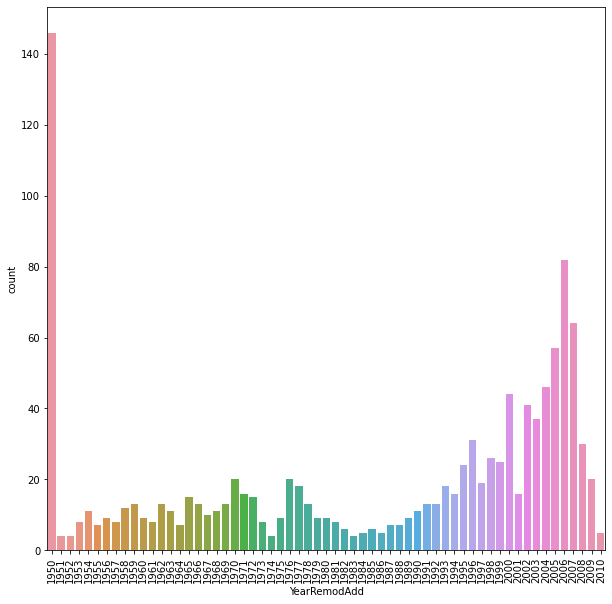

1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


In [38]:
# Analysing column YearRemodAdd

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot('YearRemodAdd', data = ds)
plt.show()

print(ds['YearRemodAdd'].value_counts())

Observations:

    1) Most of the houses were remodel in 1950.

    2) second most houses that were remodel are in 2003-2007

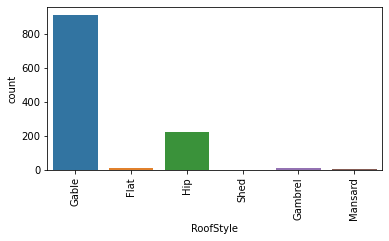

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


In [39]:
# Analysing column RoofStyle

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('RoofStyle', data = ds)
plt.show()

print(ds['RoofStyle'].value_counts())

Observations:

    1) Most of the houses have roof style of Gable. They counts 915 in number.

    2) Second most houses have roof style of Hip. They counts 225 in number.

    3) The houses with roof style of Shed are the least. They counts 2 in number.

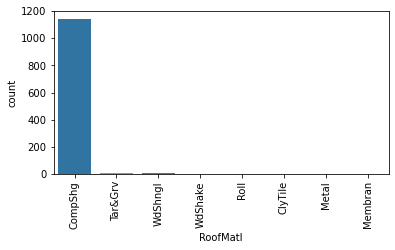

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64


In [40]:
# Analysing column RoofMatl

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('RoofMatl', data = ds)
plt.show()

print(ds['RoofMatl'].value_counts())

Observations:

    1) Most of the houses have roof material of Standard (Composite) Shingle. They counts 1144 in number.

    2) Second most houses have roof material of Gravel & Tar. They counts 10 in number.

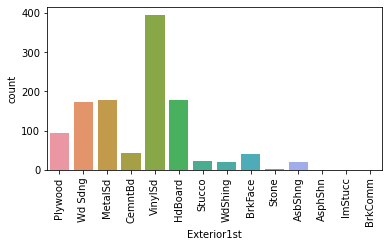

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


In [41]:
# Analysing column Exterior1st

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Exterior1st', data = ds)
plt.show()

print(ds['Exterior1st'].value_counts())

Observations:

    1) Most of the houses have Exterior covering of Vinyl Siding. They counts 396 in number.

    2) Second most houses have Exterior covering of Hard Board. They counts 179 in number.

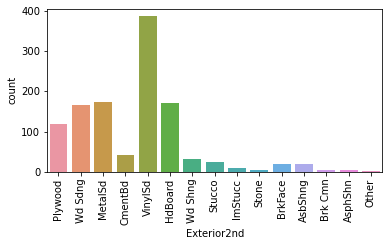

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


In [42]:
# Analysing column Exterior2nd

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Exterior2nd', data = ds)
plt.show()

print(ds['Exterior2nd'].value_counts())

Observations:

    1) Most of the houses have Exterior covering of Vinyl Siding. They counts 387 in number.

    2) Second most houses have Exterior covering of Metal Siding. They counts 173 in number.

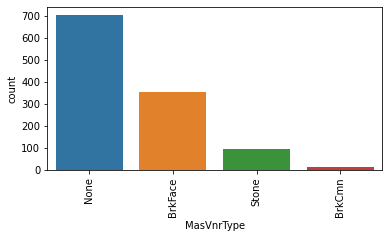

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


In [43]:
# Analysing column MasVnrType

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('MasVnrType', data = ds)
plt.show()

print(ds['MasVnrType'].value_counts())

Observations:

    1) Most of the houses don't have Masonry veneer type. They counts 703 in number.

    2) Second most houses have Brick Face Masonry veneer type. They counts 354 in number.

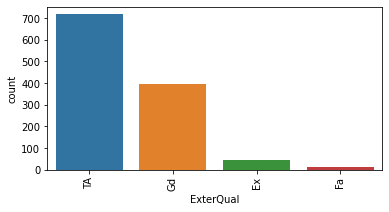

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


In [44]:
# Analysing column ExterQual

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('ExterQual', data = ds)
plt.show()

print(ds['ExterQual'].value_counts())

Observations:

    1) Most of the houses have Average/Typical uality of the material on the exterior. They counts 717 in number.

    2) Second most houses have Good uality of the material on the exterior. They counts 397 in number.

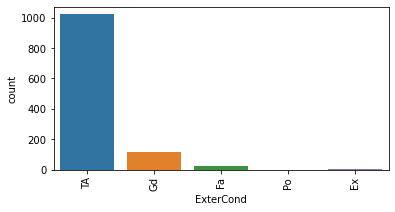

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


In [45]:
# Analysing column ExterCond

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('ExterCond', data = ds)
plt.show()

print(ds['ExterCond'].value_counts())

Observations:

    1) Most of the houses have Average/Typical quality of the material on the exterior. They counts 1022 in number.

    2) Second most houses have Good quality of the material on the exterior. They counts 117 in number.

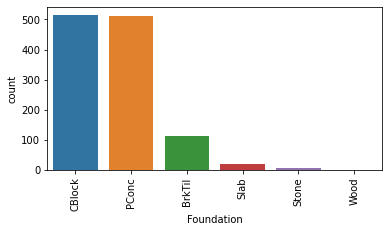

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


In [46]:
# Analysing column Foundation

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Foundation', data = ds)
plt.show()

print(ds['Foundation'].value_counts())

Observations:

    1) Most of the houses have foundation of Brick & Tile and Cinder Block.

    2) Only one house have the foundation of Wood.

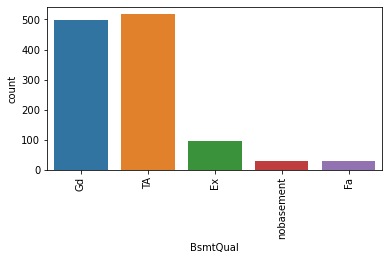

TA            517
Gd            498
Ex             94
nobasement     30
Fa             29
Name: BsmtQual, dtype: int64


In [47]:
# Analysing column BsmtQual

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BsmtQual', data = ds)
plt.show()

print(ds['BsmtQual'].value_counts())

Observations:

    1) Most of the houses have typical height of basement. There are 517 number of houses.
    
    2) Second most of the houses have Good height of basement. There are 498 number of houses.

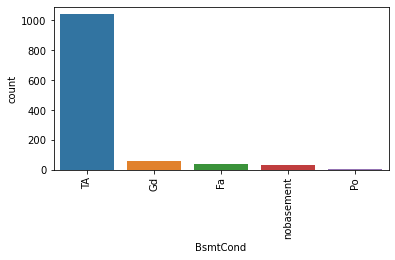

TA            1041
Gd              56
Fa              39
nobasement      30
Po               2
Name: BsmtCond, dtype: int64


In [48]:
# Analysing column BsmtCond

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BsmtCond', data = ds)
plt.show()

print(ds['BsmtCond'].value_counts())

Observations:

    1) Most of the houses have typical basement condition. There are 1041 number of houses.

    2) Second most of the houses have Good basement condition. There are 56 number of houses.

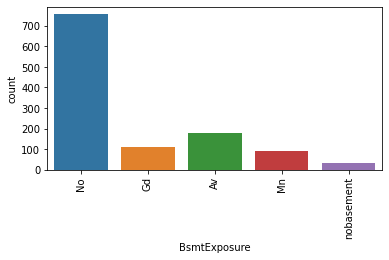

No            756
Av            180
Gd            108
Mn             93
nobasement     31
Name: BsmtExposure, dtype: int64


In [49]:
# Analysing column BsmtExposure

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BsmtExposure', data = ds)
plt.show()

print(ds['BsmtExposure'].value_counts())

Observations:

    1) Most of the houses have no exposure basement exposure. There are 756 number of houses.

    2) Second most of the houses have average exposure. There are 180 number of houses.

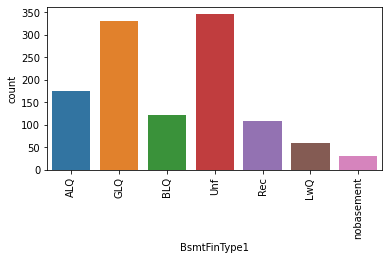

Unf           345
GLQ           330
ALQ           174
BLQ           121
Rec           109
LwQ            59
nobasement     30
Name: BsmtFinType1, dtype: int64


In [50]:
# Analysing column BsmtFinType1

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BsmtFinType1', data = ds)
plt.show()

print(ds['BsmtFinType1'].value_counts())

Observations:

    1) Most of the houses are Unfinshed basement. There are 345 number of houses under this category.

    2) Second most of the houses are Good Living Quarters. There are 330 number of houses in this category.
    
    3) There are 30 houses with no basement in it.

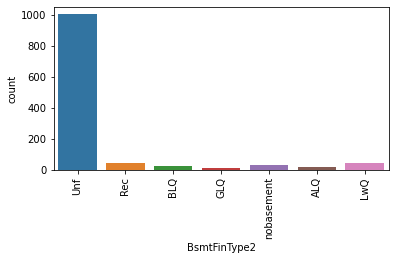

Unf           1002
Rec             43
LwQ             40
nobasement      31
BLQ             24
ALQ             16
GLQ             12
Name: BsmtFinType2, dtype: int64


In [51]:
# Analysing column BsmtFinType2

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BsmtFinType2', data = ds)
plt.show()

print(ds['BsmtFinType2'].value_counts())

Observations:

    1) Most of the houses are Unfinshed basement. There are 1002 number of houses under this category.

    2) Second most of the houses are Good Living Quarters. There are 43 number of houses in this category.

    3) There are 12 houses which are Good Living Quarters is amongst the lowest.

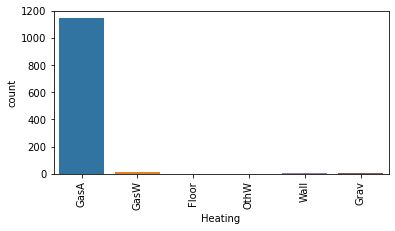

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64


In [52]:
# Analysing column Heating

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Heating', data = ds)
plt.show()

print(ds['Heating'].value_counts())

Observations:

    1) Most of the houses have Gas forced warm air furnace as heating system . There are 1143 number of houses under this category.

    2) Second most of the houses have Gas hot water or steam heat as heating system. There are 14 number of houses in this category.

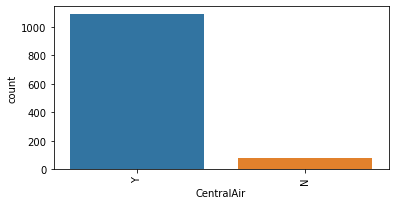

Y    1090
N      78
Name: CentralAir, dtype: int64


In [53]:
# Analysing column- CentralAir

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('CentralAir', data = ds)
plt.show()

print(ds['CentralAir'].value_counts())

Observations:

1) There are 1090 houses with Central Air Conditioning system.

2) 78 houses don't have Central Air Conditioning system.

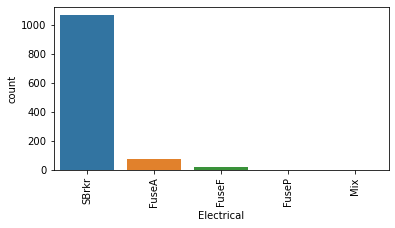

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


In [54]:
# Analysing column- Electrical

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Electrical', data = ds)
plt.show()

print(ds['Electrical'].value_counts())

Observations:

    1) There are 1070 houses fitted with Standard Circuit Breaker.

    2) 74 houses are fitted with Fuse Box over 60 AMP and all Romex wiring (Average).

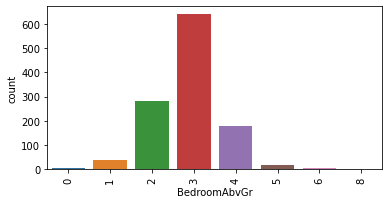

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


In [55]:
# Analysing column- BedroomAbvGr

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('BedroomAbvGr', data = ds)
plt.show()

print(ds['BedroomAbvGr'].value_counts())

Observations:

    1) There are 690 houses with 3 bedroom above grade.

    2) There are 281 houses with 2 bedroom above grade.

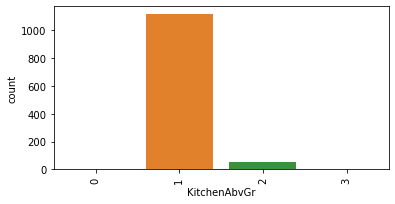

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


In [56]:
# Analysing column- KitchenAbvGr

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('KitchenAbvGr', data = ds)
plt.show()

print(ds['KitchenAbvGr'].value_counts())

Observations:

    1) There are 1114 houses with one kitchen above grade.

    2) 58 houses have 2 kitchen above grade.

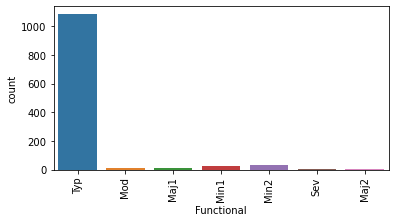

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [57]:
# Analysing column- 'Functional

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Functional', data = ds)
plt.show()

print(ds['Functional'].value_counts())

Obeservations:

1) Most of the houses have Typical Functionality. They counts to 1085 in number.

2) The houses with Minor Deductions 2 functionality lies on second. There are 518 in number.

3) There are 1 houses with Severely Damaged functionality.

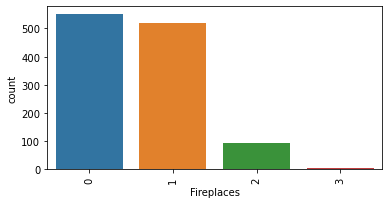

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


In [58]:
# Analysing column- 'Fireplaces

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('Fireplaces', data = ds)
plt.show()

print(ds['Fireplaces'].value_counts())

Obeservations:

    1) Most of the houses have no fire place. They counts to 551 in number.

    2) The houses with one fire place lies on second. There are 518 in number.

    3) There are 5 houses with 3 fire place.

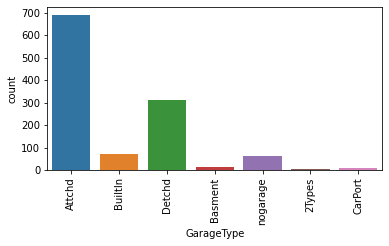

Attchd      691
Detchd      314
BuiltIn      70
nogarage     64
Basment      16
CarPort       8
2Types        5
Name: GarageType, dtype: int64


In [59]:
# Analysing column- 'GarageType

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('GarageType', data = ds)
plt.show()

print(ds['GarageType'].value_counts())

Obeservations:

    1) Most of the houses have attached garage. They counts to 691 in number.

    2) The houses with detached from home garage lies on second. There are 314 in number.

    3) There are 5 houses with more than one type of garage.

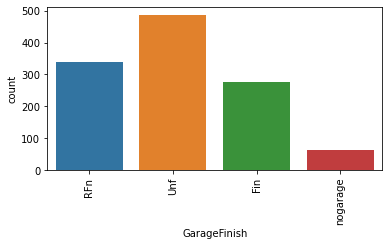

Unf         487
RFn         339
Fin         278
nogarage     64
Name: GarageFinish, dtype: int64


In [60]:
# Analysing column- GarageFinish

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('GarageFinish', data = ds)
plt.show()

print(ds['GarageFinish'].value_counts())

Obeservations:
    
    1) Most of the houses have unfinish garage. They counts to 487.
    
    2) The houses with Rough Finished garage lies on second. There are 339 in number.
    
    3) There are 64 houses with No Garage.

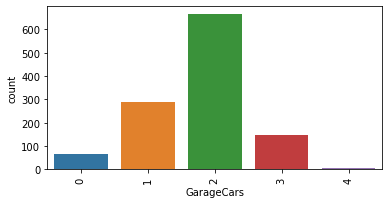

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


In [61]:
# Analysing column- GarageCars

plt.figure(figsize=(6,3))
plt.xticks(rotation=90)
sns.countplot('GarageCars', data = ds)
plt.show()

print(ds['GarageCars'].value_counts())

Observations:
    
    1) Most of the houses have the facility to park 2 or more cars. There are 665 houses with this facility.
        
    2) Garage with car parking facility is in second. There are 288 houses with this facility.
    
    3) There are only 4 houses with parking facility of 4 cars.

# BIVARIATE ANALYSIS

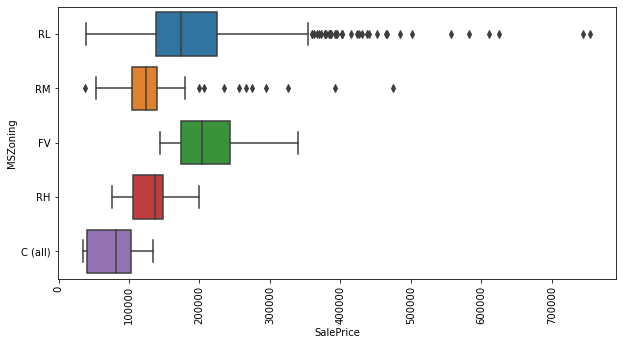

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [62]:
# Correlation b/w Sale Price and MSZoning
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['MSZoning'])
plt.show()

print(ds.groupby('SalePrice')['MSZoning'].value_counts())

As per given information: - 
    MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


Observations:
    
    1) Residential Low Density has the highest sale price. Its Mean Price is approx 170000.
    2) Second Highest Sale Price is of Floating Village Residential.Its Mean Price is approx 200000.
    3) Commertial Property has the least Sale Price.

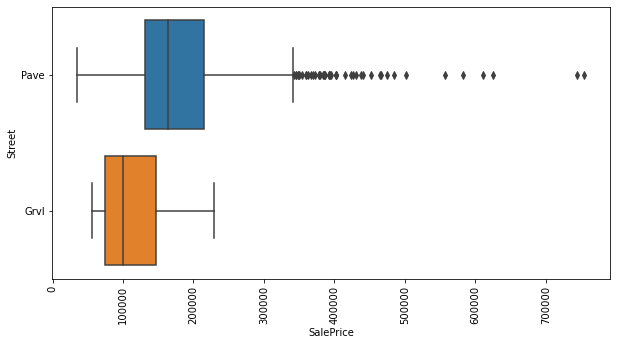

SalePrice  Street
34900      Pave      1
35311      Pave      1
37900      Pave      1
39300      Pave      1
40000      Pave      1
                    ..
582933     Pave      1
611657     Pave      1
625000     Pave      1
745000     Pave      1
755000     Pave      1
Name: Street, Length: 583, dtype: int64


In [63]:
# Correlation b/w Sale Price and Street
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Street'])
plt.show()

print(ds.groupby('SalePrice')['Street'].value_counts())

As per given information: -
    Street: Type of road access to property

       Grvl-Gravel
       Pave-Paved
        
Observations:
    
    1) The property with Paved road access has more Sale Price. It means the property which has good road connectivity have higher sale prices.
    2) Mean price of paved road access is approx 160000.
    3) The property with gravel roads have lower sale price.

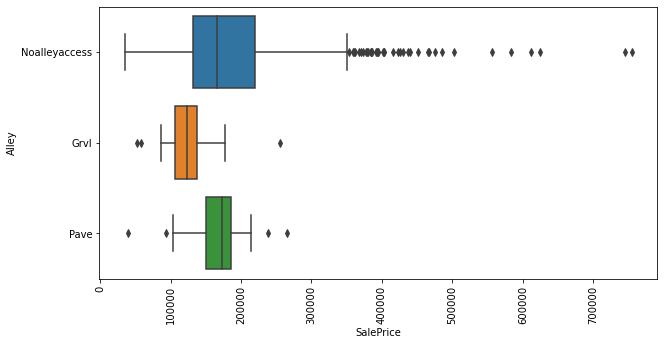

SalePrice  Alley        
34900      Noalleyaccess    1
35311      Noalleyaccess    1
37900      Noalleyaccess    1
39300      Noalleyaccess    1
40000      Pave             1
                           ..
582933     Noalleyaccess    1
611657     Noalleyaccess    1
625000     Noalleyaccess    1
745000     Noalleyaccess    1
755000     Noalleyaccess    1
Name: Alley, Length: 631, dtype: int64


In [64]:
# Correlation b/w Sale Price and Alley
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Alley'])
plt.show()

print(ds.groupby('SalePrice')['Alley'].value_counts())

As per given information: - 
    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Observations:
    
    1) The property with No Alley access have higher sale price. Mean Sale price is approc 170000.
    
    2) The property with Gravel connectivity access have lower sale price


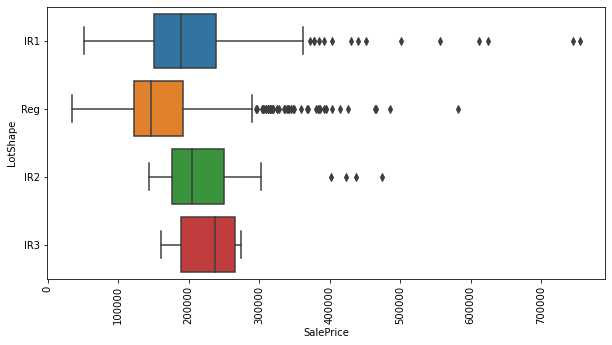

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [65]:
# Correlation b/w Sale Price and LotShape
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['LotShape'])
plt.show()

print(ds.groupby('SalePrice')['LotShape'].value_counts())

As per given information: -
    LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
        
Observations:
    
    1) The property with slightly irregular shape has higher sale price. Maximum Price is 380000.
    
    2) The price of slightly irregular shape starts with approx 50000.
    
    3) Regular Shape property starts with the price of approx 35000 and maximum price is approx 600000.
    
    4) Irregular shaped property has the least Sale Price. Min sale price is approx 160000 and Maximum is approx 280000.

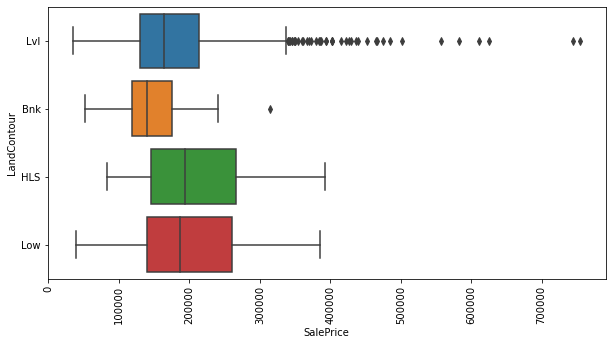

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [66]:
# Correlation b/w Sale Price and LandContour
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['LandContour'])
plt.show()

print(ds.groupby('SalePrice')['LandContour'].value_counts())

As per given information: -
    LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Observations:
    
    1) Highest Sale Price is of those property which is towards Hillside.Min Sale Price is 80000 and max price is 400000.
    
    2) Second highest Sale Price is of property near Depression. Maximum Sale Price is approx 390000.
    
    3) Property near Flat/Level has the third highest Sale Price.
    
    4) The property which is banked has the lowest Sale Price. Min Sale Price is approx 50000 and Maximum is approx 320000.

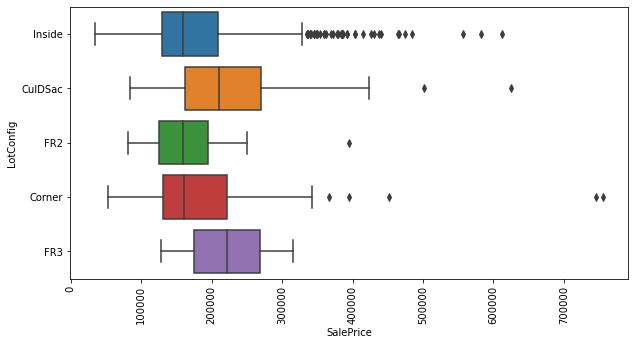

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [67]:
# Correlation b/w Sale Price and LotConfig
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['LotConfig'])
plt.show()

print(ds.groupby('SalePrice')['LotConfig'].value_counts())

As per given information: -
    LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
    
Observations:
    
    1) Cul-de-sac has the highest Sale Price. 
    2) Frontage on 2 sides of property has the lowest Sale Price.

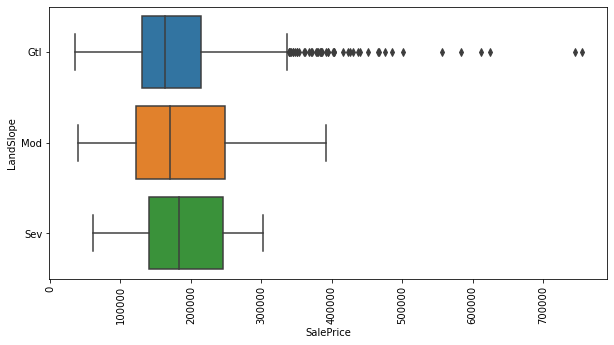

SalePrice  LandSlope
34900      Gtl          1
35311      Gtl          1
37900      Gtl          1
39300      Mod          1
40000      Gtl          1
                       ..
582933     Gtl          1
611657     Gtl          1
625000     Gtl          1
745000     Gtl          1
755000     Gtl          1
Name: LandSlope, Length: 621, dtype: int64


In [68]:
# Correlation b/w Sale Price and LandSlope
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['LandSlope'])
plt.show()

print(ds.groupby('SalePrice')['LandSlope'].value_counts())

As per given information: -
    LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
    
Observations:
    
    1) The property with moderate  slope has the highest sale price. Maximum Sale price is 400000.
    2) Second highest Sale Price is of Gentle Slope.
    3) Lowest Sale Report is of Severe Slope.

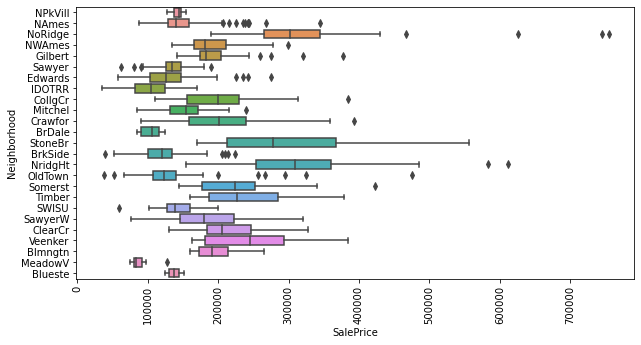

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [69]:
# Correlation b/w Sale Price and Neighborhood
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Neighborhood'])
plt.show()

print(ds.groupby('SalePrice')['Neighborhood'].value_counts())

As per given information: -
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
        
Observations: -
    
    1) The property near Stone Brook has the highest Sale Price. Maximum Sale Price is 570000.
    2) Second highest sale price is of Northridge Heights which has max sale price of approx 500000.
    3) Third highest Sale price is of Northridge whic has the max price of 430000.
    4) Lowest sale price is of Meadow Village. Max sale price is 100000.

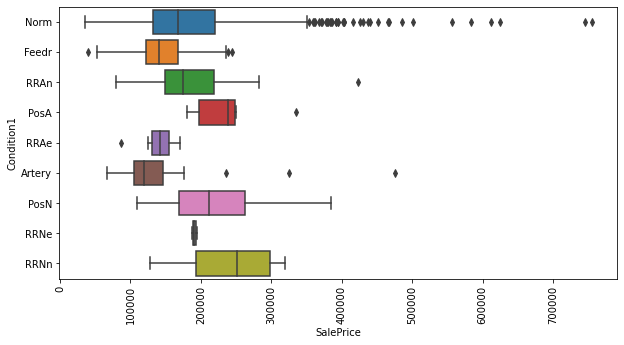

SalePrice  Condition1
34900      Norm          1
35311      Norm          1
37900      Norm          1
39300      Norm          1
40000      Feedr         1
                        ..
582933     Norm          1
611657     Norm          1
625000     Norm          1
745000     Norm          1
755000     Norm          1
Name: Condition1, Length: 689, dtype: int64


In [70]:
# Correlation b/w Sale Price and Condition1
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Condition1'])
plt.show()

print(ds.groupby('SalePrice')['Condition1'].value_counts())

As per given information: -
    Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
    
Observations:
    
    1) The area near positive off-site feature--park, greenbelt, etc. has the maximum sale price of approx 400000.
    2) The area near normal land, has the second highest sale price.
    3) The area adjacent to East-West Railroad has the lowest sale price.

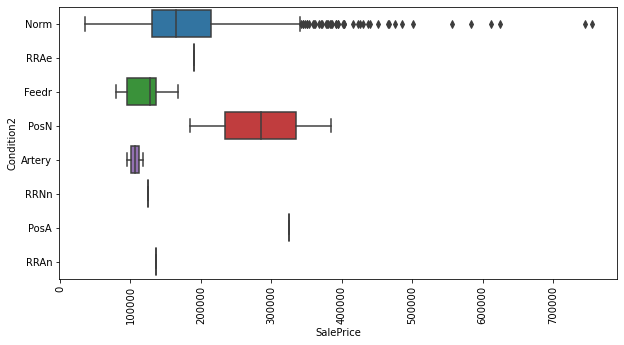

SalePrice  Condition2
34900      Norm          1
35311      Norm          1
37900      Norm          1
39300      Norm          1
40000      Norm          1
                        ..
582933     Norm          1
611657     Norm          1
625000     Norm          1
745000     Norm          1
755000     Norm          1
Name: Condition2, Length: 592, dtype: int64


In [71]:
# Correlation b/w Sale Price and Condition2
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Condition2'])
plt.show()

print(ds.groupby('SalePrice')['Condition2'].value_counts())

As per given information: -
Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
    
Observations:
    
    1) The area near positive off-site feature--park, greenbelt, etc. has the maximum sale price of approx 400000.
    2) The area near normal land, has the second highest sale price.
    3) The area adjacent to arterial street has the lowest sale price.

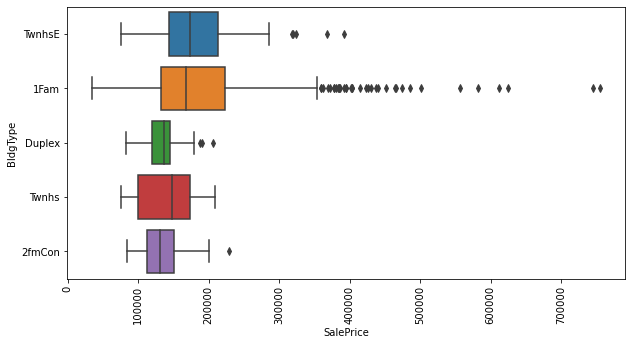

SalePrice  BldgType
34900      1Fam        1
35311      1Fam        1
37900      1Fam        1
39300      1Fam        1
40000      1Fam        1
                      ..
582933     1Fam        1
611657     1Fam        1
625000     1Fam        1
745000     1Fam        1
755000     1Fam        1
Name: BldgType, Length: 698, dtype: int64


In [72]:
# Correlation b/w Sale Price and BldgType
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BldgType'])
plt.show()

print(ds.groupby('SalePrice')['BldgType'].value_counts())

As per given information: -
    BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
    
Observations:
    
    1) The dwelling with Single family detached has the highest sale price.
    2) Townhouse Inside Unit has the second highest sale price.
    3) Duplex dwelling has the lowest sale price. Its maximum sale price is 180000.

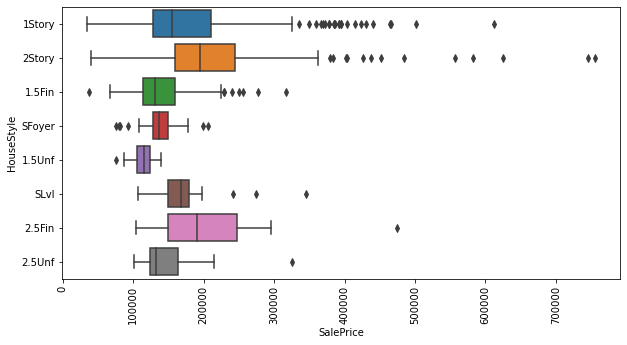

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [73]:
# Correlation b/w Sale Price and HouseStyle
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['HouseStyle'])
plt.show()

print(ds.groupby('SalePrice')['HouseStyle'].value_counts())

As per given information: -
    HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
    
Observations:
    
    1) The houses with two story has the highest sale price of max 360000.
    2) Second highest sale price is of single story which has the max sale price of 320000.
    3) Lowest sale price is of One and one-half story: 2nd level unfinished.

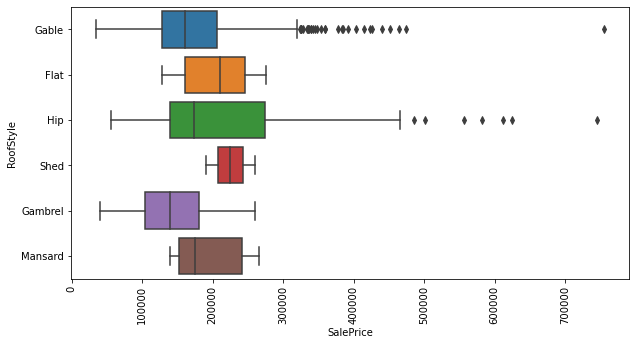

SalePrice  RoofStyle
34900      Gable        1
35311      Gable        1
37900      Gable        1
39300      Gable        1
40000      Gambrel      1
                       ..
582933     Hip          1
611657     Hip          1
625000     Hip          1
745000     Hip          1
755000     Gable        1
Name: RoofStyle, Length: 693, dtype: int64


In [74]:
# Correlation b/w Sale Price and RoofStyle
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['RoofStyle'])
plt.show()

print(ds.groupby('SalePrice')['RoofStyle'].value_counts())

As per given information: -
    RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
    
Observations:
    
    1) The roof with hip has the highest Sale Price. It has the maximum sale price of 460000.
    2) The roof with gabble has the second highest sale price. It has the maximum sale price of 320000.
    3) The roof with shed and Gambrel has the lowest sale price.

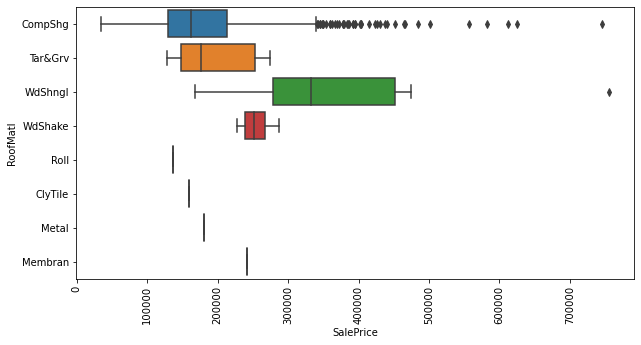

SalePrice  RoofMatl
34900      CompShg     1
35311      CompShg     1
37900      CompShg     1
39300      CompShg     1
40000      CompShg     1
                      ..
582933     CompShg     1
611657     CompShg     1
625000     CompShg     1
745000     CompShg     1
755000     WdShngl     1
Name: RoofMatl, Length: 601, dtype: int64


In [75]:
# Correlation b/w Sale Price and RoofMatl
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['RoofMatl'])
plt.show()

print(ds.groupby('SalePrice')['RoofMatl'].value_counts())

As per given information: -
    RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
    
Observations:
    
    1) For dwelling with Wood Shingles has the highest sale price. It has the maxiumun sale price of approx 480000.
    2) For dwelling with Standard (Composite) Shingle has the second highest sale price.
    3) For dwelling with Roll has the lowest sale price.

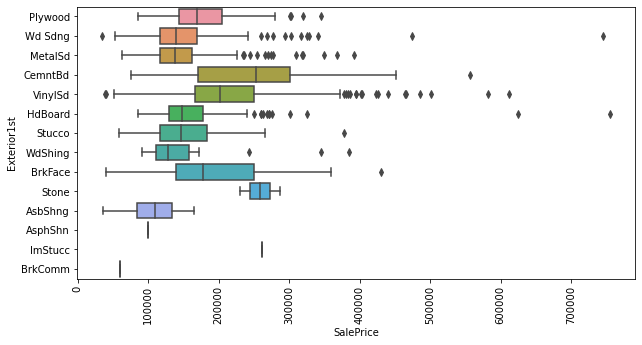

SalePrice  Exterior1st
34900      Wd Sdng        1
35311      AsbShng        1
37900      VinylSd        1
39300      VinylSd        1
40000      BrkFace        1
                         ..
582933     VinylSd        1
611657     VinylSd        1
625000     HdBoard        1
745000     Wd Sdng        1
755000     HdBoard        1
Name: Exterior1st, Length: 933, dtype: int64


In [76]:
# Correlation b/w Sale Price and Exterior1st
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Exterior1st'])
plt.show()

print(ds.groupby('SalePrice')['Exterior1st'].value_counts())

As per given information: -
    Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
    
Observations:
    
    1) The houses which has Cement Board on their exterior has the highest sale price. It has the Max price of approx 450000.
    2) The houses with Vinyl Siding has the second highest sale price. It has the Max price of approx 380000.
    3) The houses with  Brick Common has the lowest sale price.

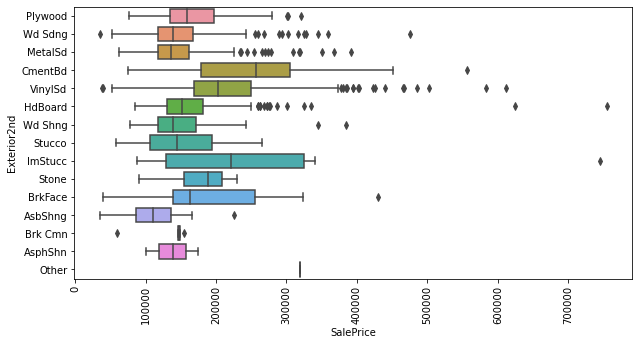

SalePrice  Exterior2nd
34900      Wd Sdng        1
35311      AsbShng        1
37900      VinylSd        1
39300      VinylSd        1
40000      BrkFace        1
                         ..
582933     VinylSd        1
611657     VinylSd        1
625000     HdBoard        1
745000     ImStucc        1
755000     HdBoard        1
Name: Exterior2nd, Length: 940, dtype: int64


In [77]:
# Correlation b/w Sale Price and Exterior2nd
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Exterior2nd'])
plt.show()

print(ds.groupby('SalePrice')['Exterior2nd'].value_counts())

As per given information: -
    Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
    
Observations:
    
    1) Observations:

1) The houses which has Cement Board on their exterior has the highest sale price. It has the Max price of approx 450000.

2) The houses with Vinyl Siding has the second highest sale price. It has the Max price of approx 380000.

3) The houses with  Brick Common has the lowest sale price.

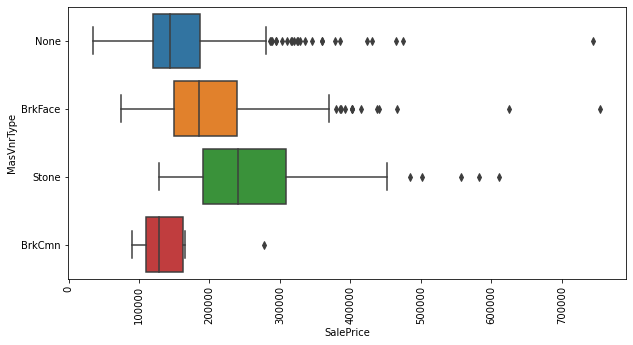

SalePrice  MasVnrType
34900      None          1
35311      None          1
37900      None          1
39300      None          1
40000      None          1
                        ..
582933     Stone         1
611657     Stone         1
625000     BrkFace       1
745000     None          1
755000     BrkFace       1
Name: MasVnrType, Length: 751, dtype: int64


In [78]:
# Correlation b/w Sale Price and MasVnrType
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['MasVnrType'])
plt.show()

print(ds.groupby('SalePrice')['MasVnrType'].value_counts())

As per given information: -
    MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Observations:
    
    1) The houses with stone Masonry veneer type have the highest sale price.
    
    2) The houses with Brick Common Masonry veneer type have the lowest sale price.

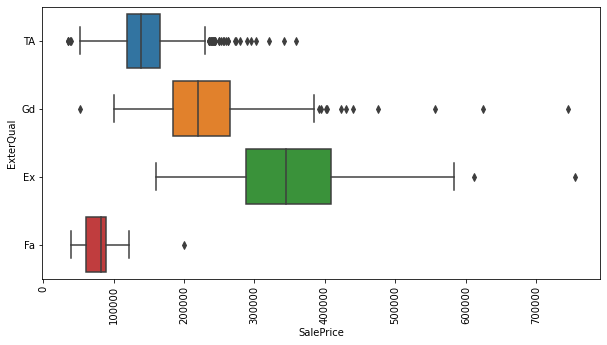

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [79]:
# Correlation b/w Sale Price and ExterQual
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['ExterQual'])
plt.show()

print(ds.groupby('SalePrice')['ExterQual'].value_counts())

As per given information: -
    ExterQual: Evaluates the quality of the material on the exterior 

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Observations:
    
    1) The houses with Excellent material on the exterior have the highest sale price.
    
    2) The houses with Fair material on the exterior have the lowest sale price.

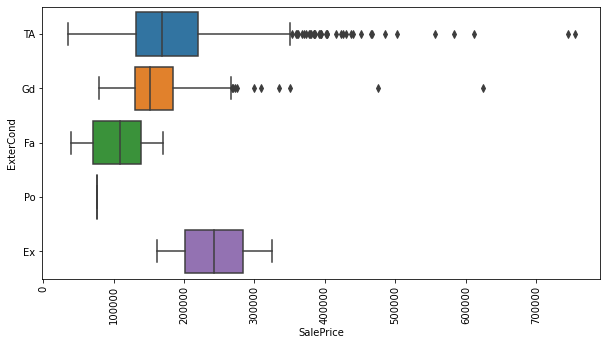

SalePrice  ExterCond
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      Fa           1
                       ..
582933     TA           1
611657     TA           1
625000     Gd           1
745000     TA           1
755000     TA           1
Name: ExterCond, Length: 673, dtype: int64


In [80]:
# Correlation b/w Sale Price and ExterCond
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['ExterCond'])
plt.show()

print(ds.groupby('SalePrice')['ExterCond'].value_counts())

As per given information: -
    ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Observations:
    
    1) The houses with Average/Typical material on the exterior have the highest sale price.
    
    2) The houses with poor material on the exterior have the lowest sale price.

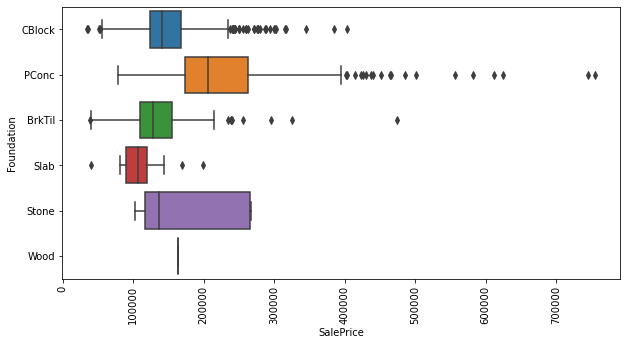

SalePrice  Foundation
34900      CBlock        1
35311      CBlock        1
37900      BrkTil        1
39300      Slab          1
40000      BrkTil        1
                        ..
582933     PConc         1
611657     PConc         1
625000     PConc         1
745000     PConc         1
755000     PConc         1
Name: Foundation, Length: 752, dtype: int64


In [81]:
# Correlation b/w Sale Price and Foundation
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Foundation'])
plt.show()

print(ds.groupby('SalePrice')['Foundation'].value_counts())

As per given information: -
    Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Observations:
    
    1) The houses with Poured Contrete foundation have the highest sale price.
    
    2) The houses with stone foundation have the second highest sale price.
    
    3) The houses with slab foundation have the lowest sale price.

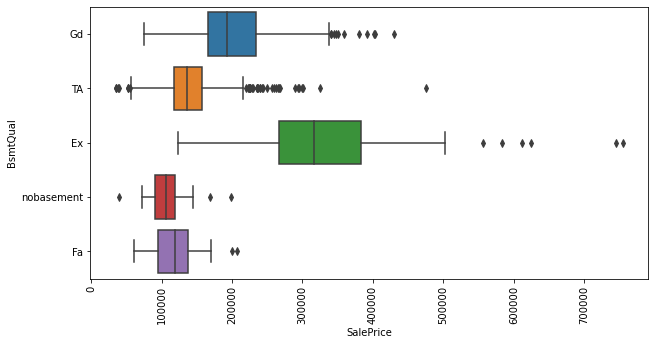

SalePrice  BsmtQual  
34900      TA            1
35311      TA            1
37900      TA            1
39300      nobasement    1
40000      TA            1
                        ..
582933     Ex            1
611657     Ex            1
625000     Ex            1
745000     Ex            1
755000     Ex            1
Name: BsmtQual, Length: 738, dtype: int64


In [82]:
# Correlation b/w Sale Price and BsmtQual
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BsmtQual'])
plt.show()

print(ds.groupby('SalePrice')['BsmtQual'].value_counts())

As per given information: -
    BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Observations:
    
    1) The houses with excellent basement quality have the higher sale price.
    
    2) The houses with good quality basement have the second highest sale price.
    
    3) The houses with no basement have thew lowest sale price.

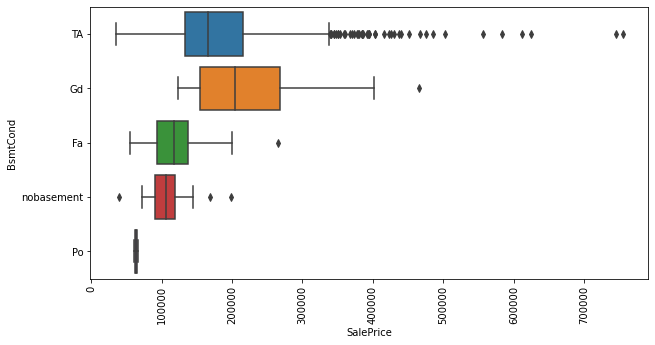

SalePrice  BsmtCond  
34900      TA            1
35311      TA            1
37900      TA            1
39300      nobasement    1
40000      TA            1
                        ..
582933     TA            1
611657     TA            1
625000     TA            1
745000     TA            1
755000     TA            1
Name: BsmtCond, Length: 648, dtype: int64


In [84]:
# Correlation b/w Sale Price and BsmtCond
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BsmtCond'])
plt.show()

print(ds.groupby('SalePrice')['BsmtCond'].value_counts())

As per given information: -
    BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Observations:
    
    1) The houses with Good basement condition have the higher sale price.
    
    2) The houses with Typical - slight dampness allowed basement condition lies on second for its sale price.
    
    3) The houses with Poor - Severe cracking, settling, or wetness basement condition have the lowest sale price.

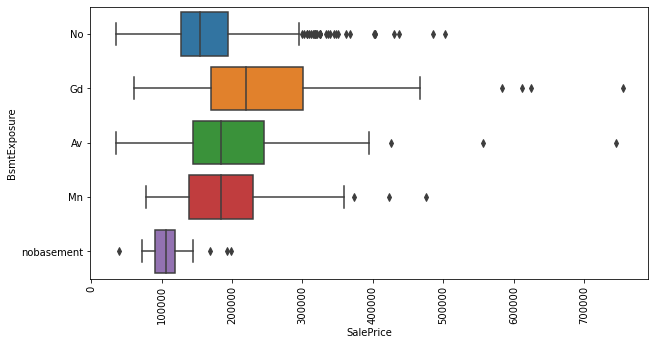

SalePrice  BsmtExposure
34900      No              1
35311      Av              1
37900      No              1
39300      nobasement      1
40000      No              1
                          ..
582933     Gd              1
611657     Gd              1
625000     Gd              1
745000     Av              1
755000     Gd              1
Name: BsmtExposure, Length: 776, dtype: int64


In [85]:
# Correlation b/w Sale Price and BsmtExposure
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BsmtExposure'])
plt.show()

print(ds.groupby('SalePrice')['BsmtExposure'].value_counts())

As per given information: -
    BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Observations:
    
    1) The houses with good exposure to garden level walls have the higher sale price. 
    
    2) The houses with average exposure to garden level walls have the second highest sale price.
    
    3) The houses with no basement have the lowest sale price.

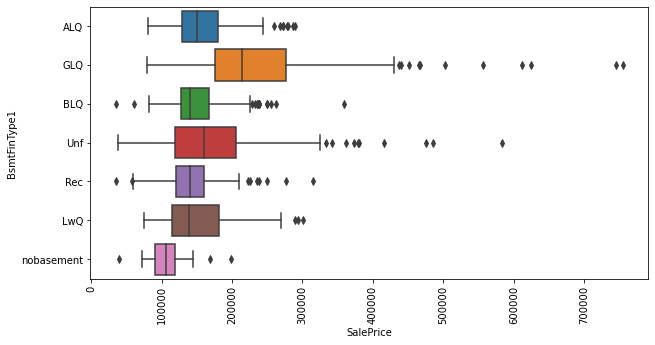

SalePrice  BsmtFinType1
34900      Rec             1
35311      BLQ             1
37900      Unf             1
39300      nobasement      1
40000      Unf             1
                          ..
582933     Unf             1
611657     GLQ             1
625000     GLQ             1
745000     GLQ             1
755000     GLQ             1
Name: BsmtFinType1, Length: 917, dtype: int64


In [86]:
# Correlation b/w Sale Price and BsmtFinType1
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BsmtFinType1'])
plt.show()

print(ds.groupby('SalePrice')['BsmtFinType1'].value_counts())

As per given information: -
    BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Observations:
    
    1) The houses with Good Living Quarters have higher sale price. It has the maximum sale price of approx 430000.
    
    2) The infinished houes lies on second for the sale price. 
    
    3) The houses with no basement have the lowest sale price.

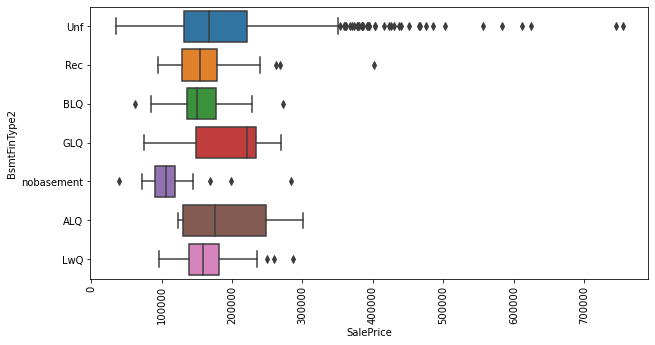

SalePrice  BsmtFinType2
34900      Unf             1
35311      Unf             1
37900      Unf             1
39300      nobasement      1
40000      Unf             1
                          ..
582933     Unf             1
611657     Unf             1
625000     Unf             1
745000     Unf             1
755000     Unf             1
Name: BsmtFinType2, Length: 692, dtype: int64


In [87]:
# Correlation b/w Sale Price and BsmtFinType2
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['BsmtFinType2'])
plt.show()

print(ds.groupby('SalePrice')['BsmtFinType2'].value_counts())

As per given information: -
    BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Observations:
    
    1) The houses with the Rating of basement finished area as Unfinshed have highest sale price.
    
    2) The houses with no basement have lowest sale price.

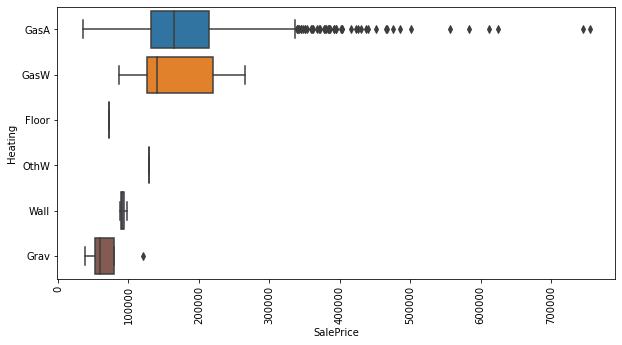

SalePrice  Heating
34900      GasA       1
35311      GasA       1
37900      Grav       1
39300      GasA       1
40000      GasA       1
                     ..
582933     GasA       1
611657     GasA       1
625000     GasA       1
745000     GasA       1
755000     GasA       1
Name: Heating, Length: 599, dtype: int64


In [88]:
# Correlation b/w Sale Price and Heating
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Heating'])
plt.show()

print(ds.groupby('SalePrice')['Heating'].value_counts())

As per given information: -
    Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Observations:
    
    1) The houses with Gas forced warm air furnace heating system have the highest sale price.
    
    2) The houses with Gravity furnace heating system have the lowestest sale price.

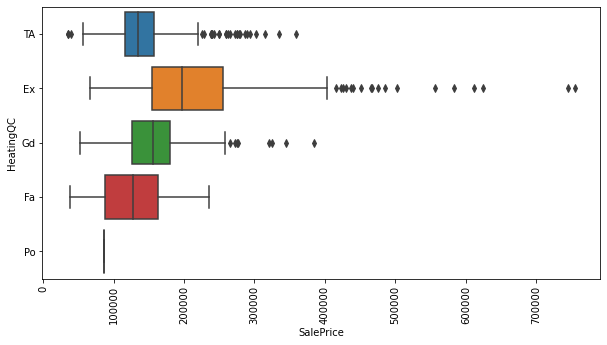

SalePrice  HeatingQC
34900      TA           1
35311      TA           1
37900      Fa           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Ex           1
745000     Ex           1
755000     Ex           1
Name: HeatingQC, Length: 790, dtype: int64


In [89]:
# Correlation b/w Sale Price and HeatingQC
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['HeatingQC'])
plt.show()

print(ds.groupby('SalePrice')['HeatingQC'].value_counts())

As per given information: -
    HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Observations:
    
    1) The houses with excellent heating quality have the highest sale price.
    
    2) The houses with poor heating quality have the lowest sale price.

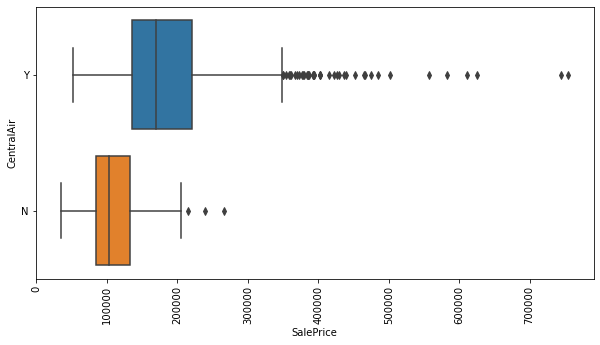

SalePrice  CentralAir
34900      N             1
35311      N             1
37900      N             1
39300      N             1
40000      N             1
                        ..
582933     Y             1
611657     Y             1
625000     Y             1
745000     Y             1
755000     Y             1
Name: CentralAir, Length: 620, dtype: int64


In [90]:
# Correlation b/w Sale Price and CentralAir
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['CentralAir'])
plt.show()

print(ds.groupby('SalePrice')['CentralAir'].value_counts())

As per given information: -
    CentralAir: Central air conditioning

       N	No
       Y	Yes

Observations:
    
    1) The houses with Central air conditioning have the highest sale price.

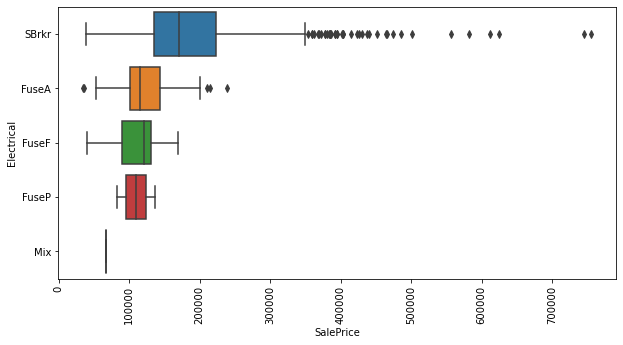

SalePrice  Electrical
34900      FuseA         1
35311      FuseA         1
37900      SBrkr         1
39300      FuseF         1
40000      SBrkr         1
                        ..
582933     SBrkr         1
611657     SBrkr         1
625000     SBrkr         1
745000     SBrkr         1
755000     SBrkr         1
Name: Electrical, Length: 640, dtype: int64


In [91]:
# Correlation b/w Sale Price and Electrical
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Electrical'])
plt.show()

print(ds.groupby('SalePrice')['Electrical'].value_counts())

As per given information: -
    Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Observations:
    
    1) The houses with Standard Circuit Breakers & Romex have the highest sale price. It has the maximum sale price of approx 350000.
    
    2) The houses with mixed type of electrical system have the lowest sale price.

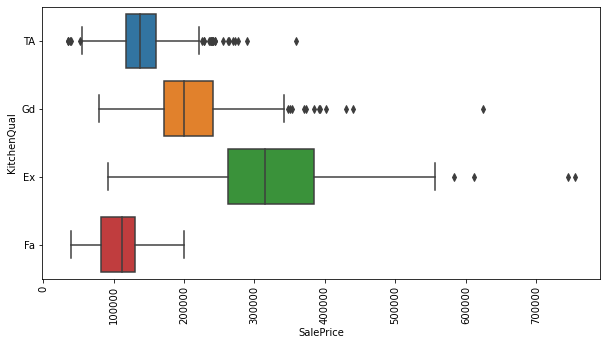

SalePrice  KitchenQual
34900      TA             1
35311      TA             1
37900      TA             1
39300      Fa             1
40000      TA             1
                         ..
582933     Ex             1
611657     Ex             1
625000     Gd             1
745000     Ex             1
755000     Ex             1
Name: KitchenQual, Length: 710, dtype: int64


In [92]:
# Correlation b/w Sale Price and KitchenQual
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['KitchenQual'])
plt.show()

print(ds.groupby('SalePrice')['KitchenQual'].value_counts())

As per given information: -
    KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Observations:
    
    1) The houses with Excellent kitchen quality have the highest sale price. It has the maximum sale price of approx 570000.
    
    2) The houses with fair quality of kitchen has the lowest sale price.

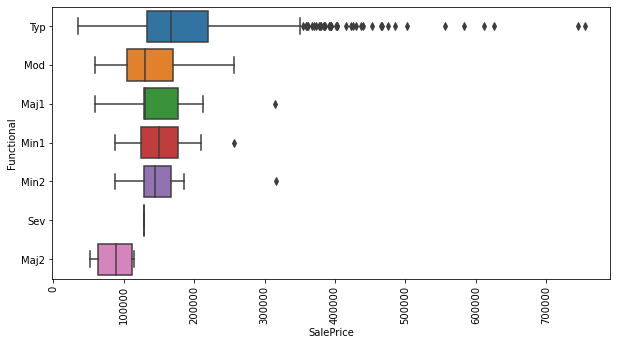

SalePrice  Functional
34900      Typ           1
35311      Typ           1
37900      Typ           1
39300      Typ           1
40000      Typ           1
                        ..
582933     Typ           1
611657     Typ           1
625000     Typ           1
745000     Typ           1
755000     Typ           1
Name: Functional, Length: 638, dtype: int64


In [93]:
# Correlation b/w Sale Price and Functional
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Functional'])
plt.show()

print(ds.groupby('SalePrice')['Functional'].value_counts())

As per given information: -
    Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Observations:
    
    1) The Home with Typical Functionality have the highest sale price. It has the maximum sale price of approx 350000.
    
    2) The Home with Major Deductions 2 has the lowest sale price.

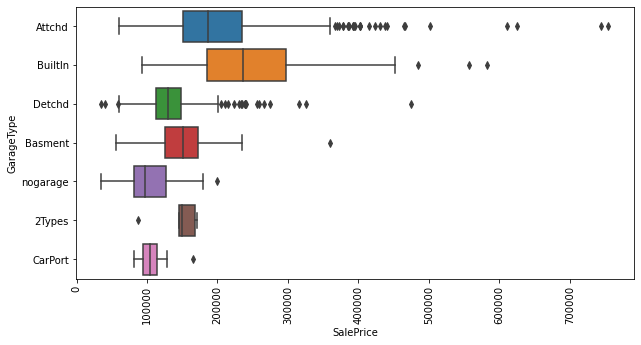

SalePrice  GarageType
34900      nogarage      1
35311      Detchd        1
37900      nogarage      1
39300      nogarage      1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [94]:
# Correlation b/w Sale Price and GarageType
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['GarageType'])
plt.show()

print(ds.groupby('SalePrice')['GarageType'].value_counts())

As per given information: -
    GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Observations:
    
    1) The houses with builtin garage have the higher sale price.
    
    2) The houses with car port have the lowest sale price.

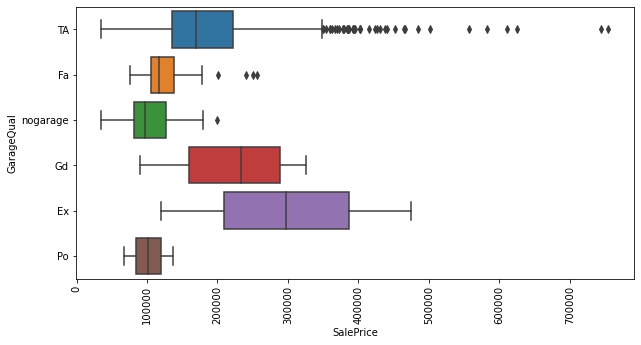

SalePrice  GarageQual
34900      nogarage      1
35311      TA            1
37900      nogarage      1
39300      nogarage      1
40000      TA            1
                        ..
582933     TA            1
611657     TA            1
625000     TA            1
745000     TA            1
755000     TA            1
Name: GarageQual, Length: 647, dtype: int64


In [96]:
# Correlation b/w Sale Price and GarageQual
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['GarageQual'])
plt.show()

print(ds.groupby('SalePrice')['GarageQual'].value_counts())

As per given information: -
    GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Observations:

1) The houses with Excellent Garage quality have the highest sale price. It has the maximum sale price of 480000.

2) The houses with Typical/Average Garage quality have the second highest sale price.

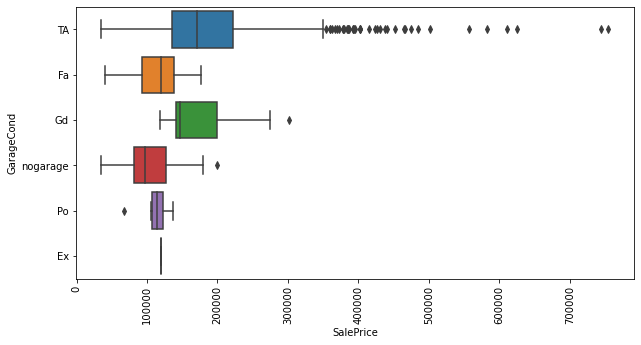

SalePrice  GarageCond
34900      nogarage      1
35311      TA            1
37900      nogarage      1
39300      nogarage      1
40000      Fa            1
                        ..
582933     TA            1
611657     TA            1
625000     TA            1
745000     TA            1
755000     TA            1
Name: GarageCond, Length: 641, dtype: int64


In [97]:
# Correlation b/w Sale Price and GarageCond
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['GarageCond'])
plt.show()

print(ds.groupby('SalePrice')['GarageCond'].value_counts())

As per given information: -
    GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garag

Observations:
    
    1) The houses with Typical/Average Garage condition have the highest sale price. It has the maximum sale price of 350000.
    
    2) The houses with Good Garage condition have the second highest sale price.

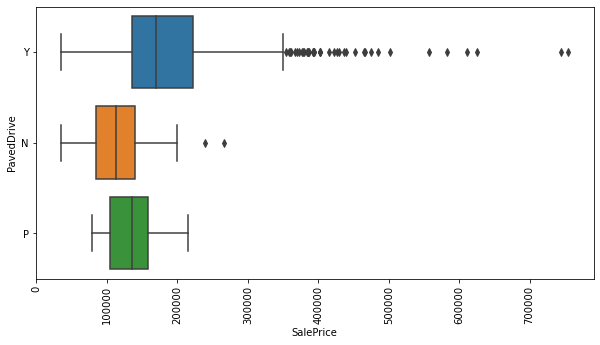

SalePrice  PavedDrive
34900      N             1
35311      Y             1
37900      Y             1
39300      N             1
40000      N             1
                        ..
582933     Y             1
611657     Y             1
625000     Y             1
745000     Y             1
755000     Y             1
Name: PavedDrive, Length: 642, dtype: int64


In [98]:
# Correlation b/w Sale Price and PavedDrive
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['PavedDrive'])
plt.show()

print(ds.groupby('SalePrice')['PavedDrive'].value_counts())

As per given information: -
    PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Observations:
    
    1) The houses with paved driveway have the highest sale price of maximum 300000 approx.
    
    2) The houses with Dirt/Gravel have the lowest sale price.

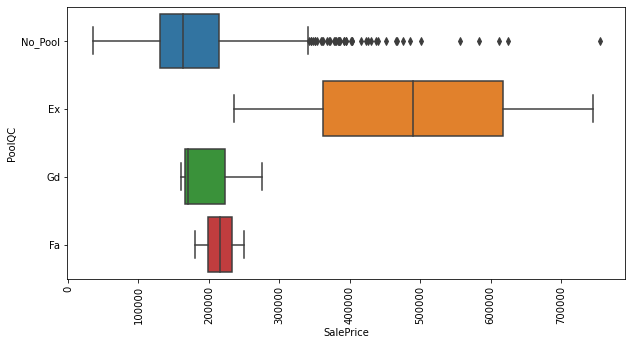

SalePrice  PoolQC 
34900      No_Pool    1
35311      No_Pool    1
37900      No_Pool    1
39300      No_Pool    1
40000      No_Pool    1
                     ..
582933     No_Pool    1
611657     No_Pool    1
625000     No_Pool    1
745000     Ex         1
755000     No_Pool    1
Name: PoolQC, Length: 586, dtype: int64


In [99]:
# Correlation b/w Sale Price and PoolQC
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['PoolQC'])
plt.show()

print(ds.groupby('SalePrice')['PoolQC'].value_counts())

As per given information: -
    PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Observations:
    
    1) The houses with Excellent pool quality have the highest selling prices. It has the maximum sale price of approx 750000.
    
    2) The houses with fair quality of pool has the lowest sale price.

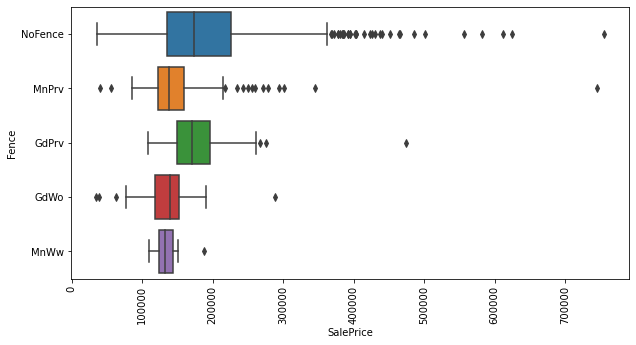

SalePrice  Fence  
34900      GdWo       1
35311      NoFence    1
37900      GdWo       1
39300      NoFence    1
40000      MnPrv      1
                     ..
582933     NoFence    1
611657     NoFence    1
625000     NoFence    1
745000     MnPrv      1
755000     NoFence    1
Name: Fence, Length: 726, dtype: int64


In [100]:
# Correlation b/w Sale Price and Fence
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['Fence'])
plt.show()

print(ds.groupby('SalePrice')['Fence'].value_counts())

As per given information: -
    Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Observations:
    
    1) The houses with no fence have higher sale price. It has maximum price of approx 370000.
    
    2) The houses with Good Privacy has the second highest sale price of approx 270000.
    
    3) The houses with Minimum Wood/Wire have the least sale price.

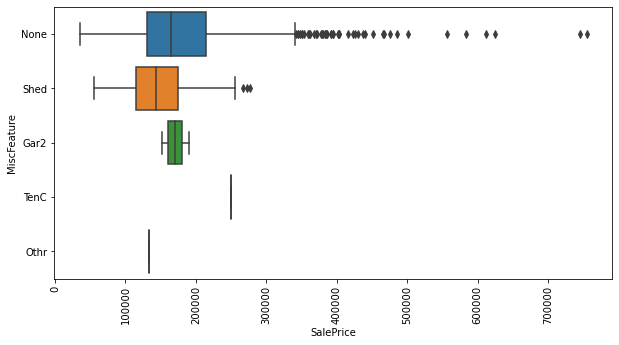

SalePrice  MiscFeature
34900      None           1
35311      None           1
37900      None           1
39300      None           1
40000      None           1
                         ..
582933     None           1
611657     None           1
625000     None           1
745000     None           1
755000     None           1
Name: MiscFeature, Length: 608, dtype: int64


In [101]:
# Correlation b/w Sale Price and MiscFeature
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['MiscFeature'])
plt.show()

print(ds.groupby('SalePrice')['MiscFeature'].value_counts())

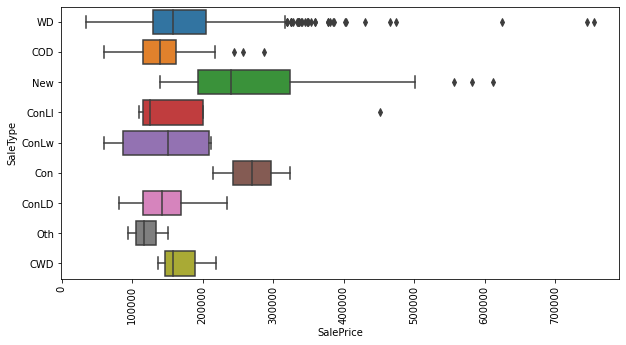

SalePrice  SaleType
34900      WD          1
35311      WD          1
37900      WD          1
39300      WD          1
40000      WD          1
                      ..
582933     New         1
611657     New         1
625000     WD          1
745000     WD          1
755000     WD          1
Name: SaleType, Length: 650, dtype: int64


In [102]:
# Correlation b/w Sale Price and SaleType
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['SaleType'])
plt.show()

print(ds.groupby('SalePrice')['SaleType'].value_counts())

As per given information: -
    SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

Observations:
    
    1) The houses which are new have higher sale price. The maxium sale price is approx 500000.
    
    2) Warranty Deed - Conventional and Contract 15% Down payment regular terms have second highest sale price of approx 330000
    
    3) Other properties have the least sale price of maximum 150000.

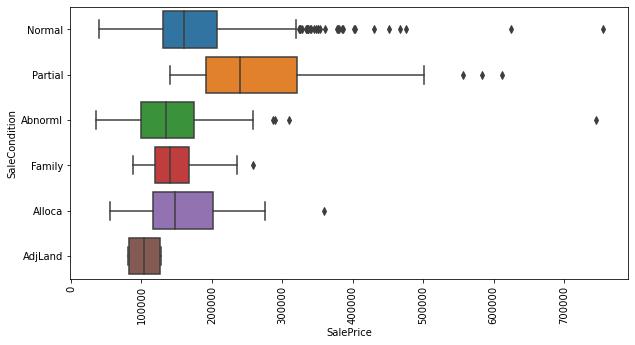

SalePrice  SaleCondition
34900      Abnorml          1
35311      Abnorml          1
37900      Abnorml          1
39300      Normal           1
40000      Normal           1
                           ..
582933     Partial          1
611657     Partial          1
625000     Normal           1
745000     Abnorml          1
755000     Normal           1
Name: SaleCondition, Length: 676, dtype: int64


In [103]:
# Correlation b/w Sale Price and SaleCondition
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(x= ds['SalePrice'],y =ds['SaleCondition'])
plt.show()

print(ds.groupby('SalePrice')['SaleCondition'].value_counts())

As per given information: -
    SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Observations:
    
    1) Partial completed house has highest Sale Price. Maximum Sale Price is 500000.
    2) The property with Normal Sale has the second highest Sale Price.

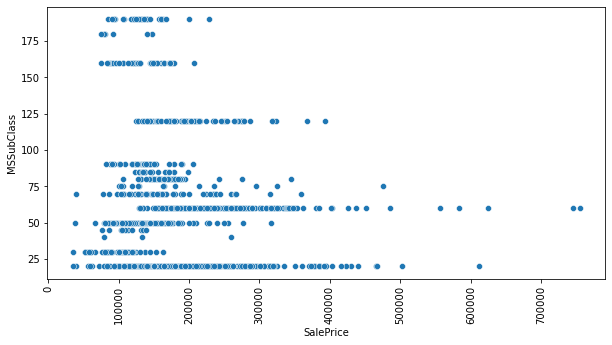

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


In [104]:
# Correlation b/w Sale Price and MSSubClass
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['SalePrice'],y =ds['MSSubClass'])
plt.show()

print(ds['MSSubClass'].value_counts())

As per given information: -
    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Observations:
    
    1) 1-STORY 1946 & NEWER ALL STYLES has the highest number of property in Sale which counts to 428 in number.
    2) 2-STORY 1946 & NEWER is the second highest in sale which consists of 244 in number.
    3) 1/2 STORY FINISHED ALL AGES is third in number.
    4) 1-STORY W/FINISHED ATTIC ALL AGES is the lowest amongst all in sale. It consists of only 3 property.

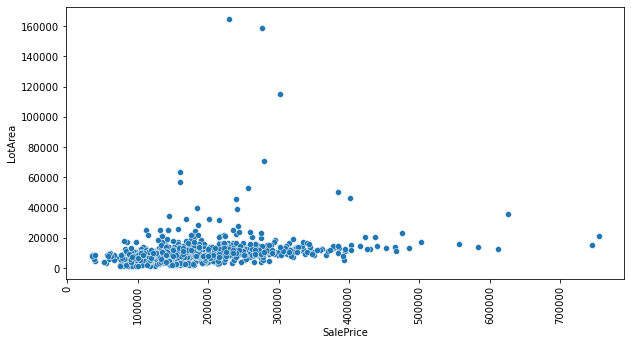

SalePrice  LotArea
34900      7879       1
35311      9000       1
37900      5925       1
39300      5000       1
40000      8500       1
                     ..
582933     13891      1
611657     12919      1
625000     35760      1
745000     15623      1
755000     21535      1
Name: LotArea, Length: 1161, dtype: int64


In [105]:
# Correlation b/w Sale Price and LotArea
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['SalePrice'],y =ds['LotArea'])
plt.show()

print(ds.groupby('SalePrice')['LotArea'].value_counts())

As per given information: -
    LotArea: Lot size in square feet

Observations:
    
    1) Most of the property have lot area below 20000.
    2) Prices of these property lies between 80000 to 300000.
    3) Only two property has lot area more than 160000 and their cost is approx 250000 and 300000.
    4) Only two property has price more than 700000 and their cost is approx 745000 and 755000.

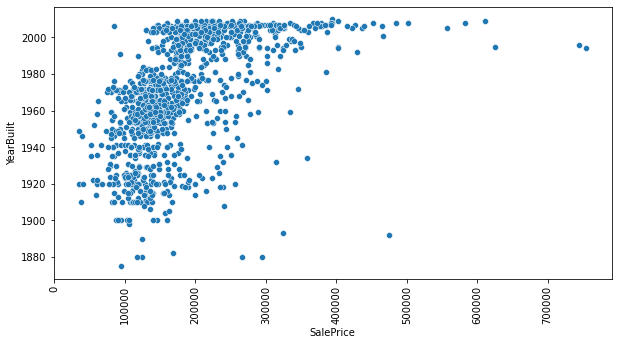

SalePrice  YearBuilt
34900      1920         1
35311      1949         1
37900      1910         1
39300      1946         1
40000      1920         1
                       ..
582933     2008         1
611657     2009         1
625000     1995         1
745000     1996         1
755000     1994         1
Name: YearBuilt, Length: 1126, dtype: int64


In [106]:
# Correlation b/w Sale Price and YearBuilt
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['SalePrice'],y =ds['YearBuilt'])
plt.show()

print(ds.groupby('SalePrice')['YearBuilt'].value_counts())

As per given information: -
    YearBuilt: Original construction date

Observations:
    
    1) Most of the property are constructed in between 1950 and 1979.
    2) The prices of houses build in between 1950 and 1979 lies between 100000 to 200000. 
    3) Second Most constructed house are in year 1990 and above.
    4) The prices of these houses lies between 150000 to 300000.
    5) Sale Price and Year Built are positively correlated. The sale price of new house are more as compared houses build in 1920's.

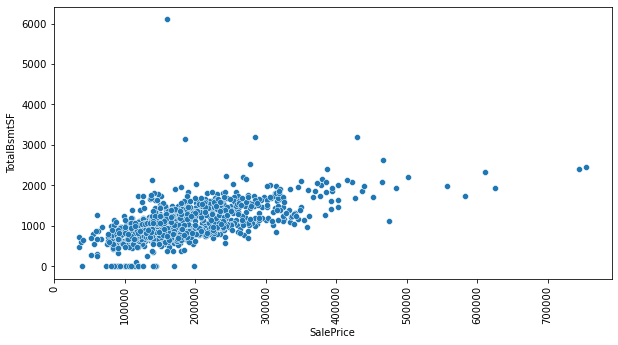

SalePrice  TotalBsmtSF
34900      720            1
35311      480            1
37900      600            1
39300      0              1
40000      649            1
                         ..
582933     1734           1
611657     2330           1
625000     1930           1
745000     2396           1
755000     2444           1
Name: TotalBsmtSF, Length: 1159, dtype: int64


In [107]:
# Correlation b/w Sale Price and TotalBsmtSF
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x= ds['SalePrice'],y =ds['TotalBsmtSF'])
plt.show()

print(ds.groupby('SalePrice')['TotalBsmtSF'].value_counts())

As per given information: - TotalBsmtSF: Total square feet of basement area

Observations:

1) Sale Price and TotalBsmtSF are positively correlated. As the area is increasing, the price is also increasing.

2) Most of the housed has basement area between 1000 to 2000 sq ft.

3) Only one house has the basement area more than 6000 sq ft.

4) Only two houses with basement area of approx 2200 sq ft and its sale price is more than 700000.


### LABEL ENCODING OF TRAIN DATASET

In [109]:
# selecting columns and excluding column with dtpye int64

ds1 = ds.select_dtypes(exclude='int64')

In [113]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ds1.columns:
    ds[i] = le.fit_transform(ds1[i])

### FEATURE ENGINEERING

In [114]:
# Loading feature selection Libraries

from sklearn.feature_selection import mutual_info_classif

In [115]:
# Checking shape of dataset

ds.shape

(1168, 79)

In [116]:
# Defining X & Y for establishing correlation b/w features and Sale Price

X = ds.iloc[:,:78]
Y = ds.iloc[:,-1]

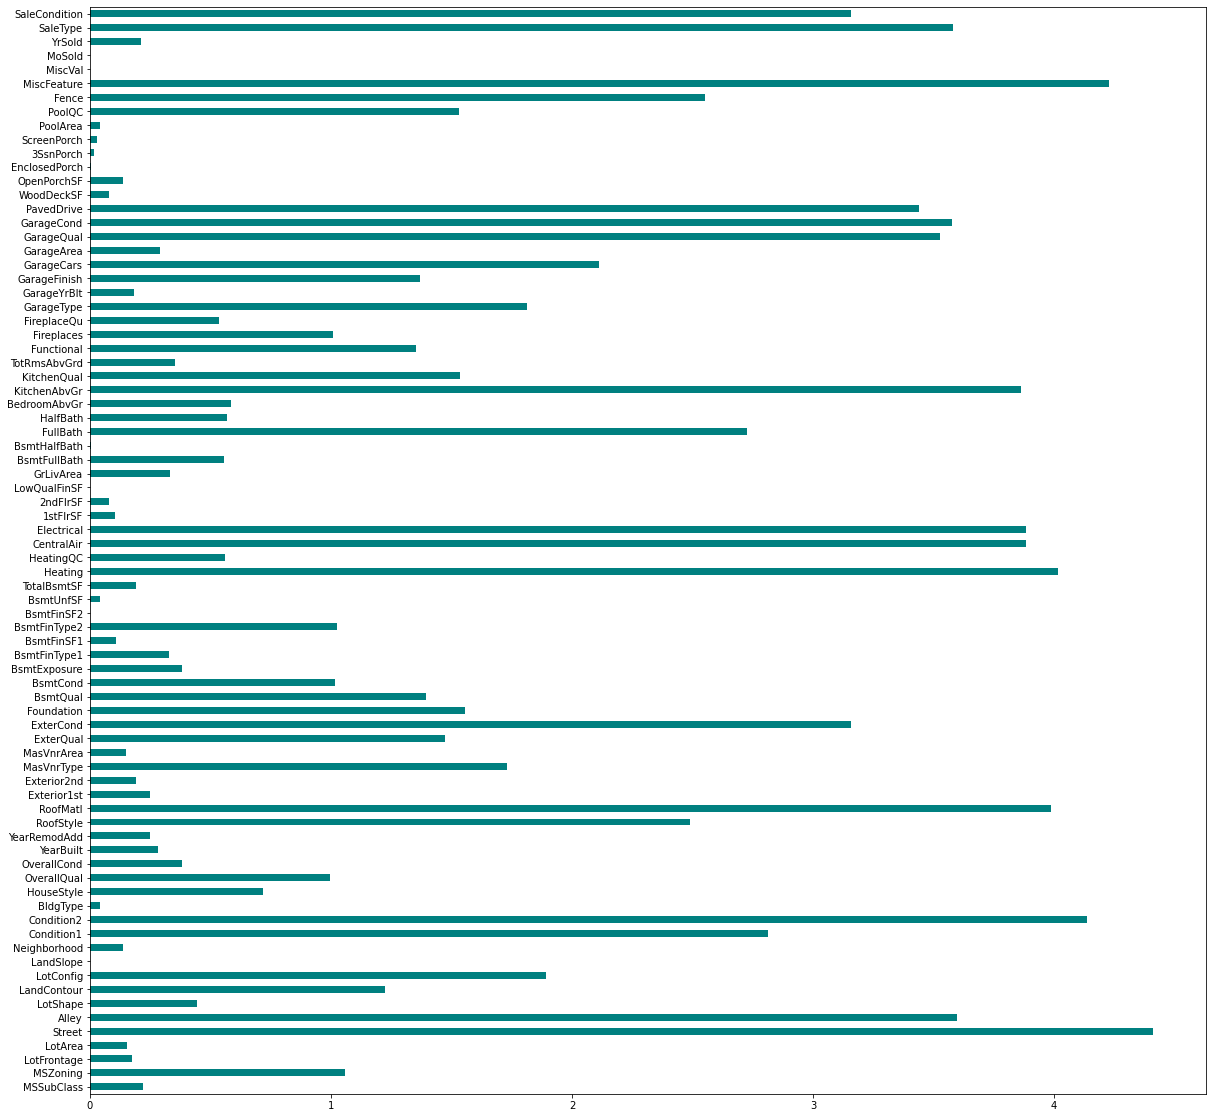

In [117]:
importance = mutual_info_classif(X, Y)
feat_importance = pd.Series(importance, ds.columns[0:len(ds.columns)-1])
feat_importance.plot(kind = 'barh',color = 'teal',figsize = (20,20))
plt.show()

### HEAT HAP FOR CHECKING CORRELATION WITH TARGET

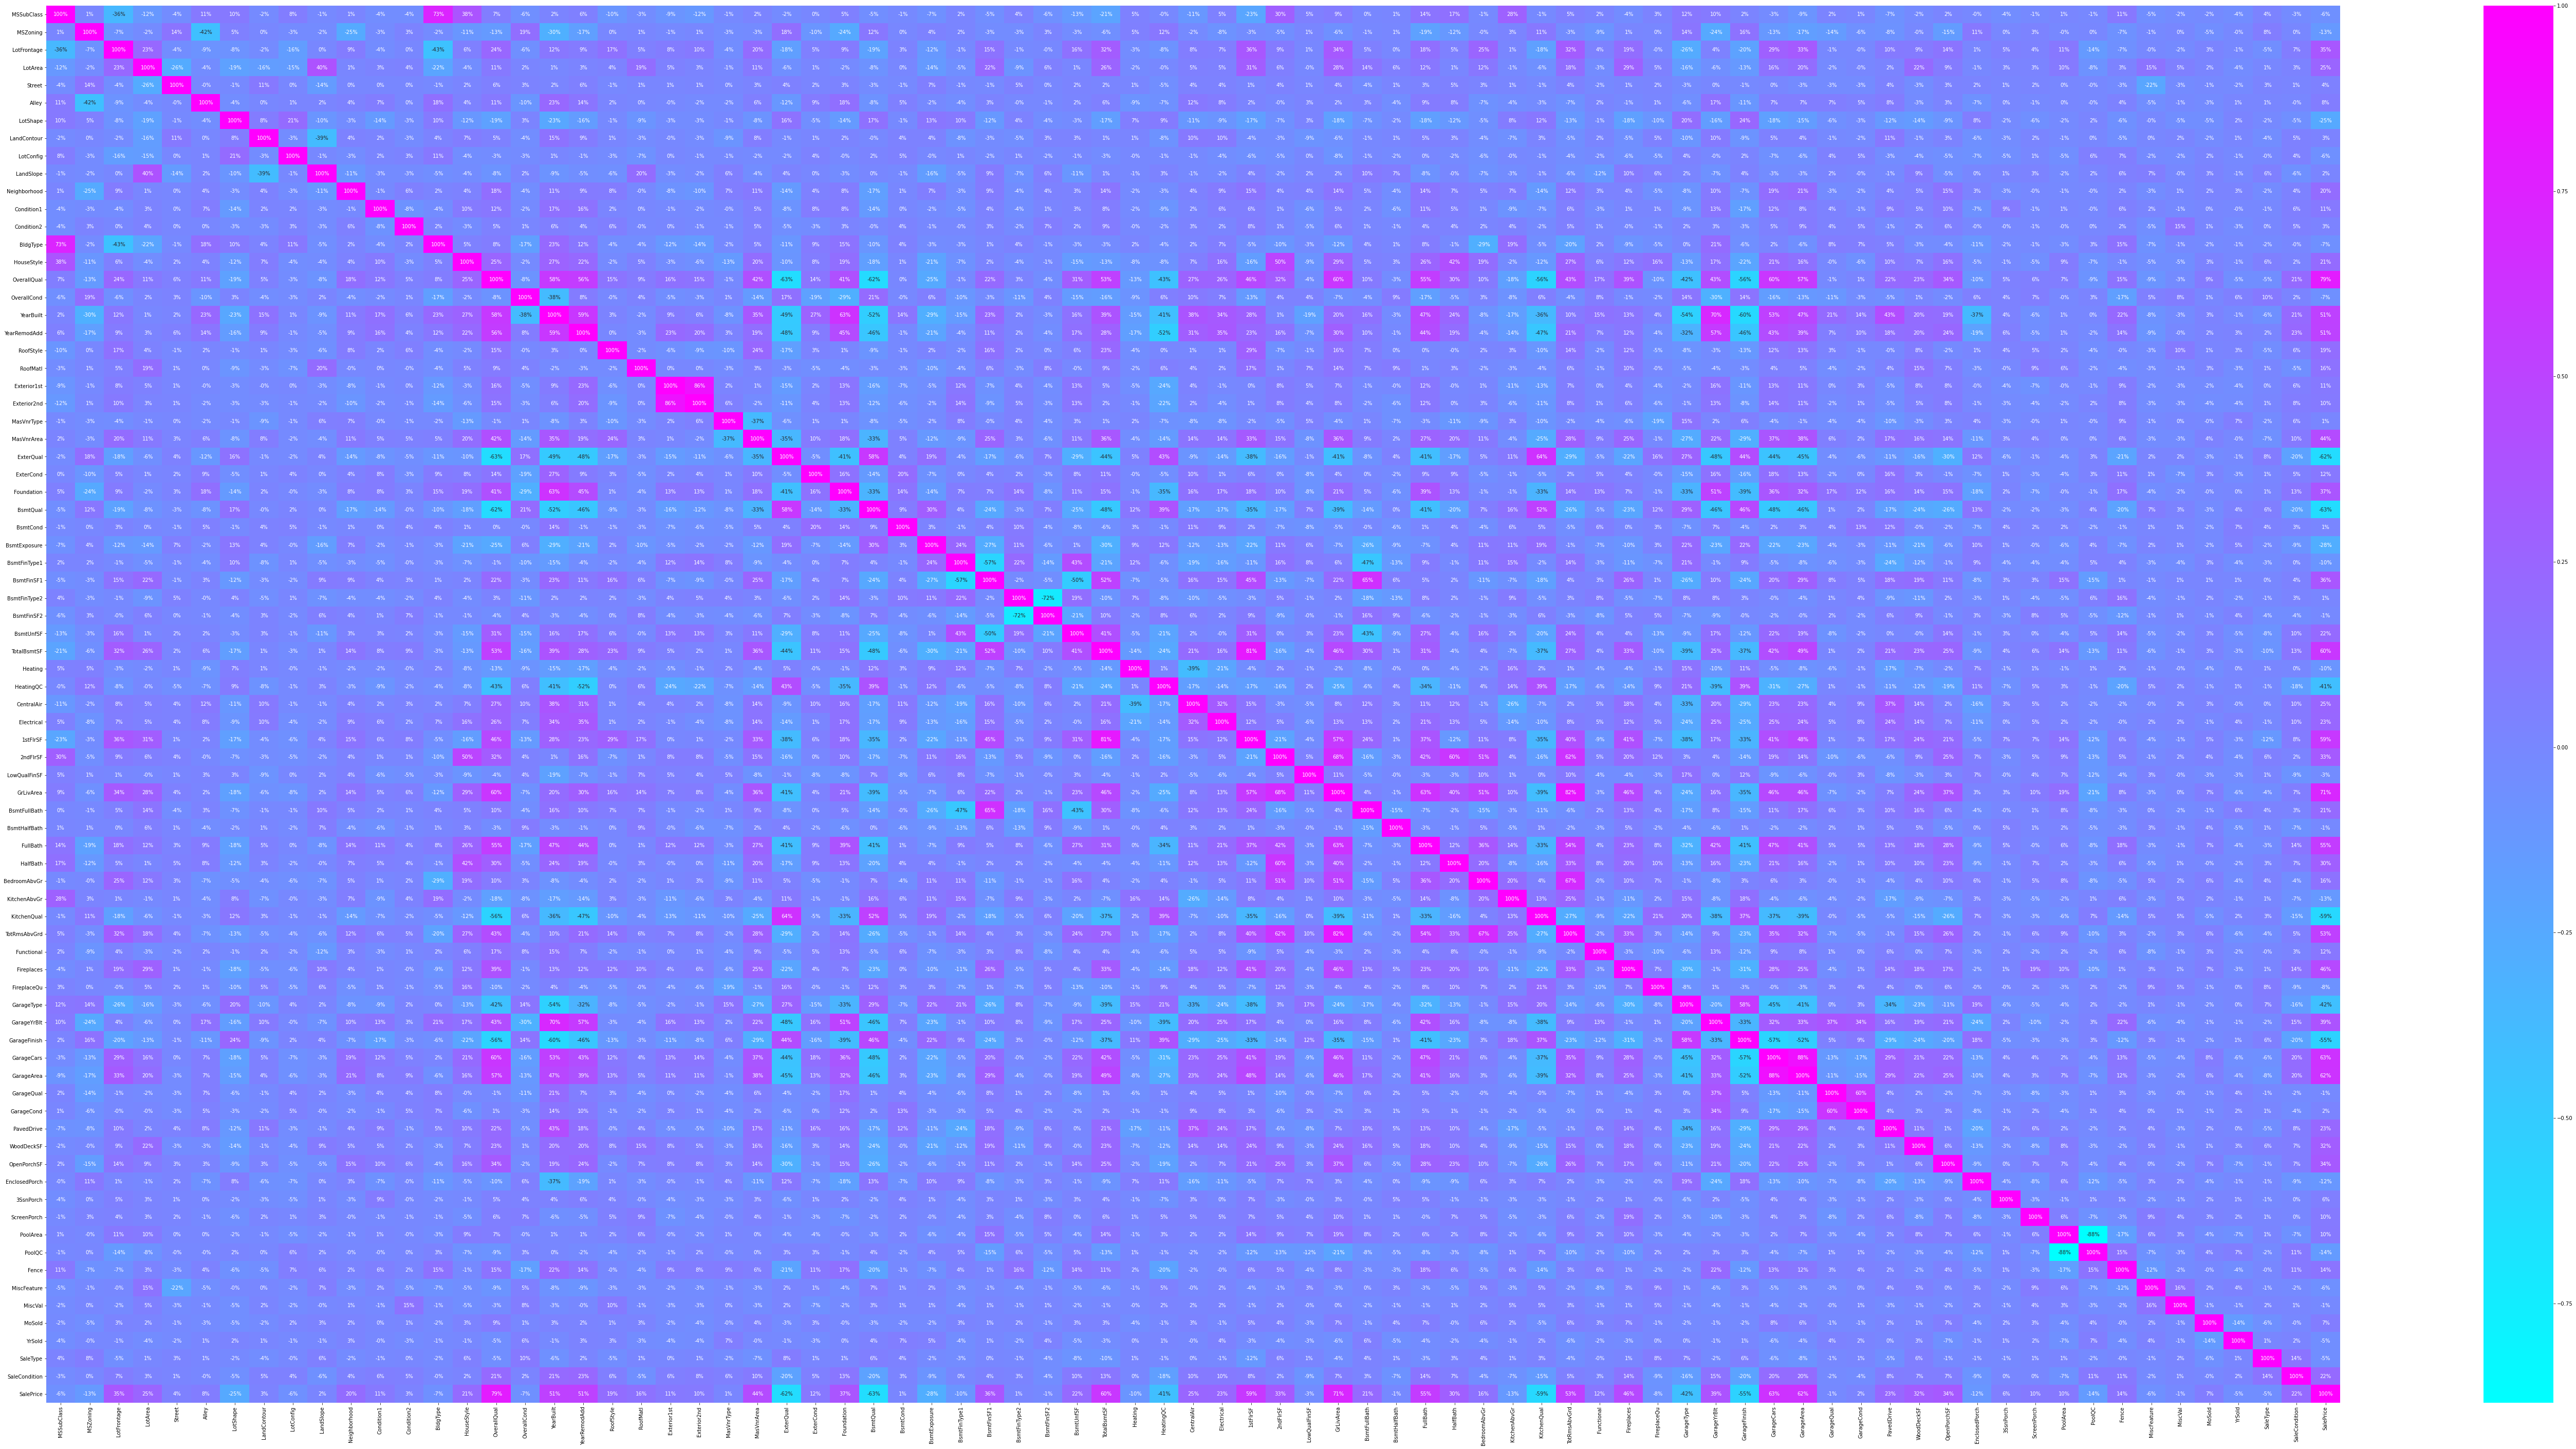

In [118]:
# Plotting heatmap to check correlation.

plt.figure(figsize=(100,50))
plt.xticks(rotation=90)
sns.heatmap(ds.corr(),annot=True,fmt='.0%',cmap='cool')
plt.show()

Observations: - 
    
    1) Following features are highly correlated with target Sale Price:
        
        •	OverallQual
        •	YearBuilt 
        •	YearRemodAdd
        •	MasVerArea
        •	Foundation
        •	BsmtFinSF1
        •	TotoalBsmtSF
        •	1stFlrSF
        •	2ndFlrSF
        •	GrLivArea
        •	FullBath
        •	TotRmsAbvGrd
        •	Fireplaces
        •	GarageYrBlt
        •	GarageCars
        •	GarageArea
        •	OpenPorchSF

        
    2) Following features are negatively correlated with target Sale Price:
        
        •	LotShape
        •	ExterQual
        •	BsmtQual
        •	BsmtExposure
        •	HeatingQC
        •	KitchenQual
        •	GarageType
        •	GarageFinish

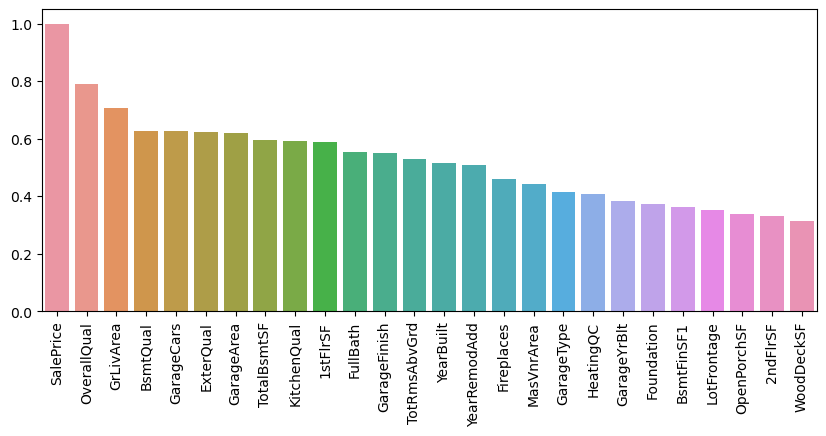

In [119]:
# Checking column with possitive correlation

corr = abs(ds.corr()["SalePrice"]).sort_values(ascending = False)
z_corr = corr[corr > 0.3]

plt.figure(figsize = (10, 4), dpi = 100)
sns.barplot(x = z_corr.index, y = z_corr.values)
plt.xticks(rotation = 90)
plt.show()

### DETECTING OUTLIERS IN DATASET

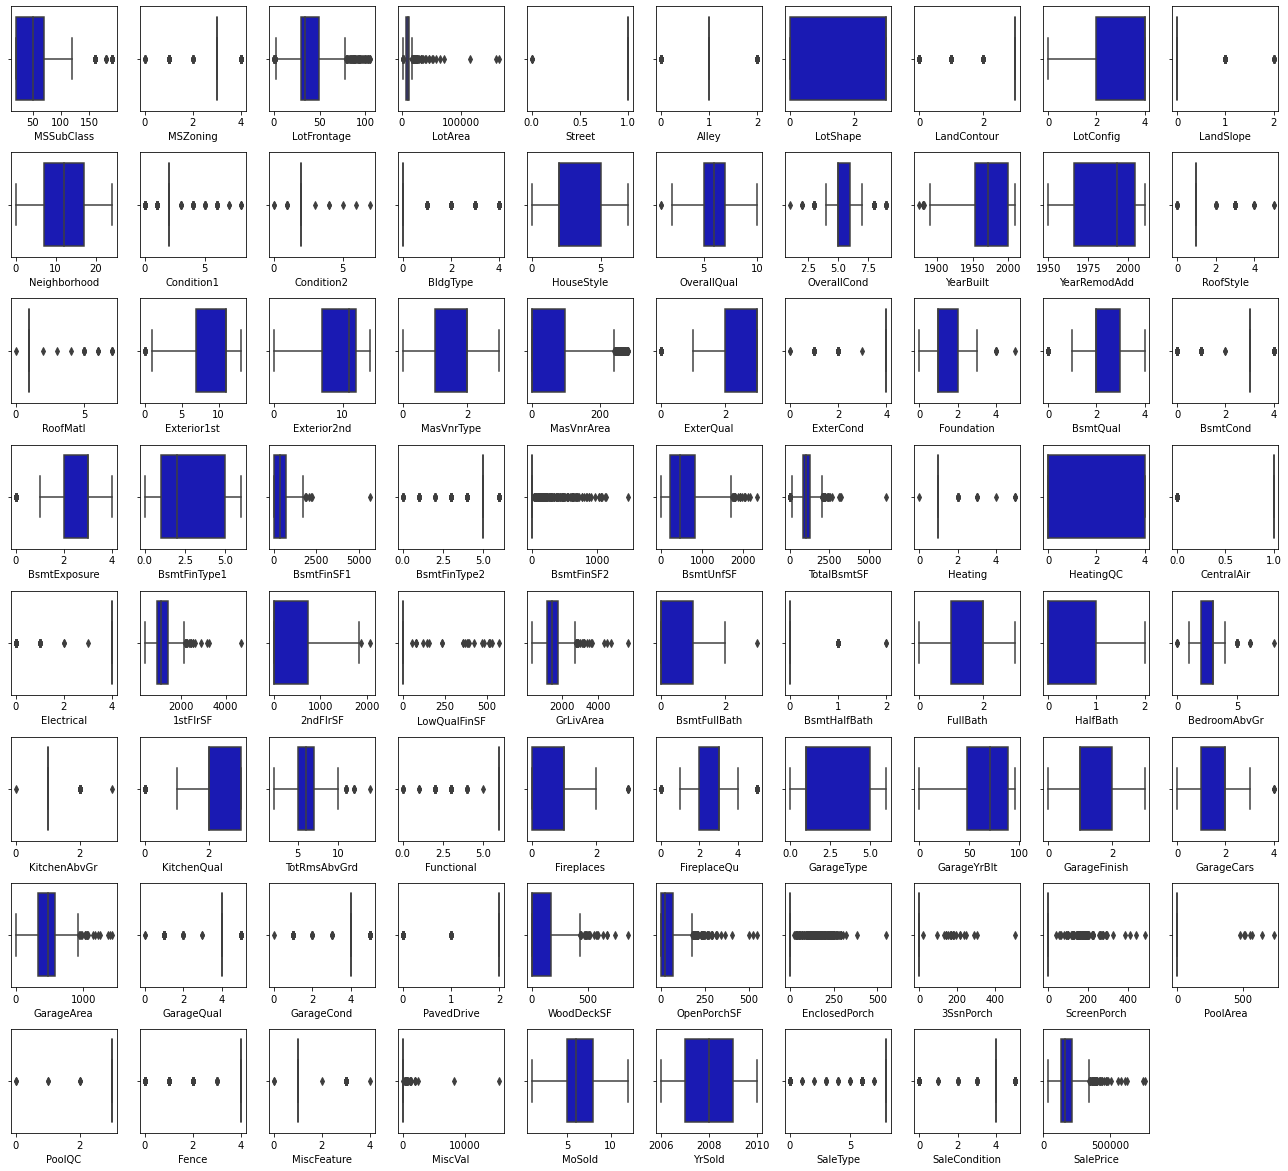

In [120]:
collist=ds.describe().columns # selecting all the columns
# Specify number of rows and columns for subplot
nrow=10
ncol=10
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(ds[collist[i]],color='#0000CD',orient='v')
    plt.tight_layout()
plt.show()

Observations:
    
    1) We can observe that huge outliers are present in our dataset.
    2) We need to check whether we remove it or keep the outliers from dataset.

### REMOVING OUTLIERS

In [121]:
from scipy.stats import zscore

In [122]:
# Determining absolute zscore of train dataset.

z=np.abs(zscore(ds))
z

array([[1.50830058, 0.02164599, 0.45149754, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.40107895, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 1.24228667, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 1.98648949, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.98080511, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.45149754, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [123]:
# Considering threshold limit as 3 to find outilers. If the limit is more than 3, it will be removed

threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


In [124]:
# Creating new dataset with no outliers.

ds_new=ds[(z<3).all(axis=1)]
ds_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,30,4928,1,1,0,3,4,0,...,0,3,4,1,0,2,2007,8,4,128000
2,60,3,62,9920,1,1,0,3,1,0,...,0,3,4,1,0,6,2007,8,4,269790
5,60,3,28,14054,1,1,0,3,4,0,...,0,3,4,1,0,11,2006,6,5,219210
6,20,3,30,11341,1,1,0,3,4,0,...,0,3,4,1,0,5,2010,8,4,121500
11,60,3,14,9548,1,1,0,3,1,0,...,0,3,4,1,0,1,2010,8,4,237000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,20,3,30,11250,1,1,0,3,4,0,...,0,3,4,1,0,6,2006,8,4,165000
1161,60,3,30,10762,1,1,0,3,1,0,...,0,3,4,1,0,5,2009,8,4,225000
1163,20,3,30,9819,1,1,0,3,4,0,...,0,3,2,1,0,2,2010,8,4,122000
1165,160,3,1,2280,1,1,3,3,2,0,...,0,3,4,1,0,7,2009,8,4,148500


#### Observation:

Percentage loss of data after removal of data is approx 7%. This loss is on higher side, So we will keep outliers.

### SKEWNESS CHECK OF TRAIN DATASET

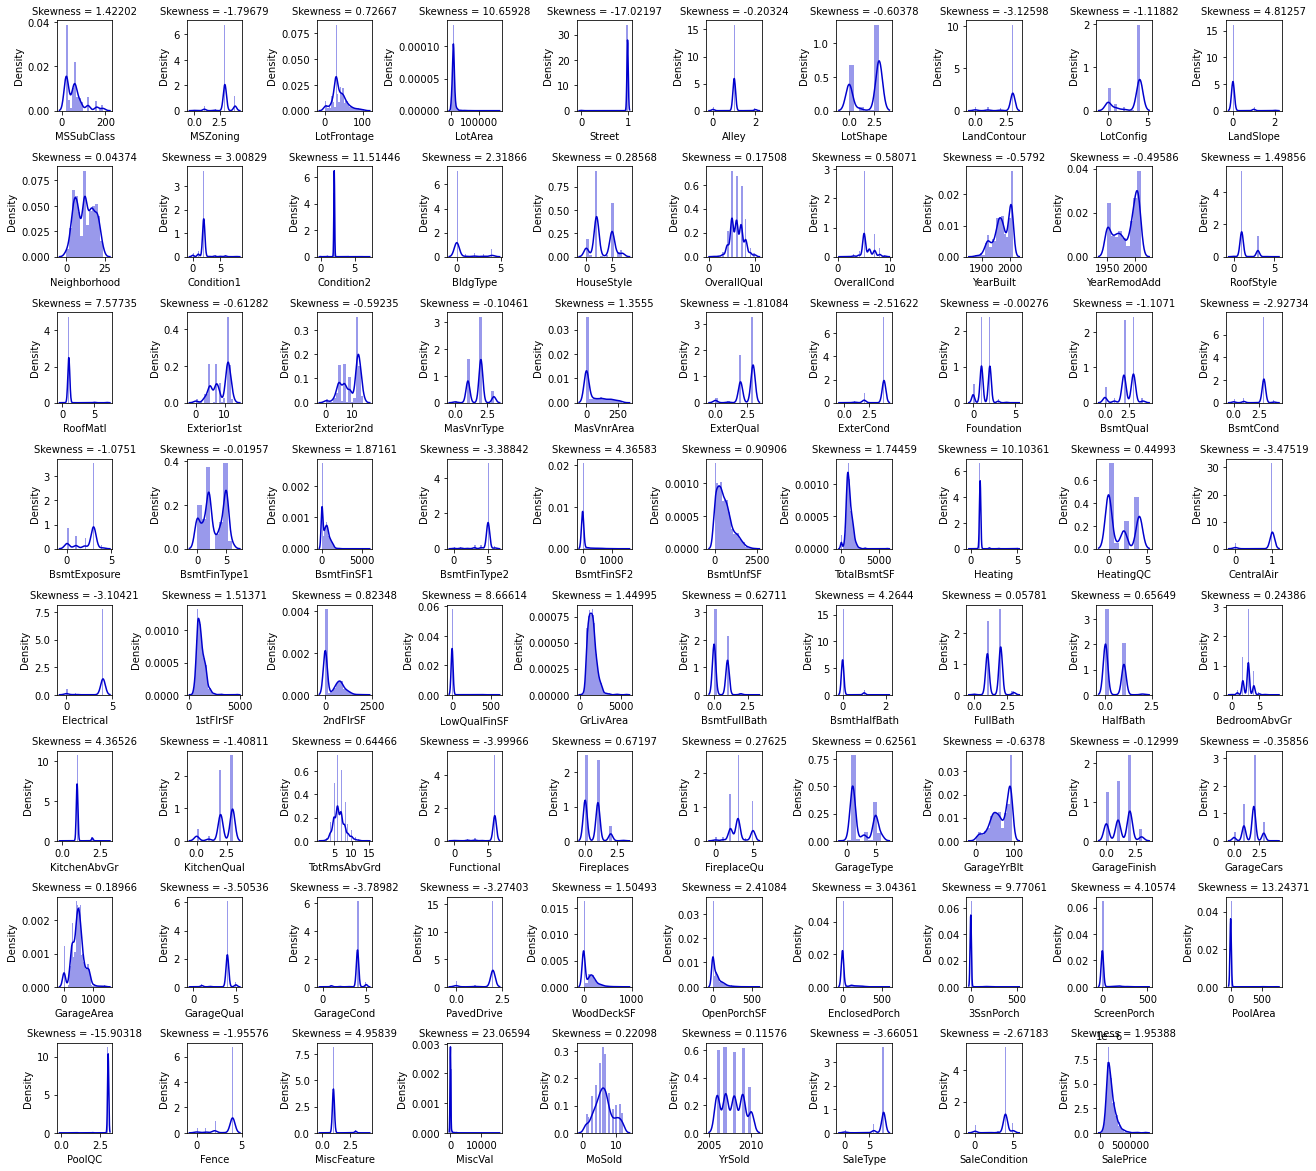

In [125]:
# selecting all the columns to check skewness
collist=ds.describe().columns

# Specifying number of rows and columns for subplot
nrow=10
ncol=10
plt.figure(figsize=(18,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(f"Skewness = {round(ds[collist[i]].skew(),5)}",fontsize=10)
    sns.distplot(ds[collist[i]],color='#0000CD')
    plt.tight_layout()
plt.show()

Observations:
    
    1) Approx all columns are skewed.
    
    2) Few column are highly skewed
    
    3) We need to remove the skewness before model building.

### MAKING BEST MACHINE LEARNING MODELS

In [126]:
# Loading required libraries for creating Machine Learning Models

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [127]:
# Splitting into test and train column from dataset

x = ds.drop('SalePrice',axis = 1)
y = ds['SalePrice']

In [128]:
# Removing skewness from train dataset

from sklearn.preprocessing import power_transform

x = power_transform(x,method='yeo-johnson')

In [129]:
# Scaling train dataset

sc=StandardScaler()

x=sc.fit_transform(x)

### SINCE THE SALE PRICE COLUMN OR OUR TARGET COLUMN IS CONTINUES IN NATURE, SO WE WILL USE REGRESSION MODEL TO EVALUATE

In [130]:
# Testing best random state and model for evaluation

model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]

max_r2score=0
for ran_state in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=ran_state)
    for i in model:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        r2_sco=r2_score(y_test,y_pred)
        if r2_sco > max_r2score:
            max_r2score = r2_sco
            final_state = ran_state
            final_model= i
        

print('max r2_score with random_state',final_state,'is',max_r2score,'and model is',final_model)

max r2_score with random_state 181 is 0.930635733363087 and model is GradientBoostingRegressor()


In [131]:
# Splitting data into test and train. Taking 20% as test size

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=198)

In [132]:
# Loop for finding accuracy score of different models

model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Score of',m,'is',score)
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
    print('R2_Score:',r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is 0.8319057789646481
MAE : 23635.33756279855
MSE: 1218786951.5616038
RSME: 153.7378859058448
R2_Score: 0.8421505304735081
*************************************************************************************************************


Score of DecisionTreeRegressor() is 1.0
MAE : 29382.30769230769
MSE: 1885066787.965812
RSME: 171.41268241383918
R2_Score: 0.7558582391113076
*************************************************************************************************************


Score of RandomForestRegressor() is 0.9756682151233664
MAE : 18306.903504273505
MSE: 794609132.7468368
RSME: 135.3030062647298
R2_Score: 0.8970873211890846
*************************************************************************************************************


Score of KNeighborsRegressor() is 0.8069413737961165
MAE : 25011.09572649573
MSE: 1601131559.711453
RSME: 158.1489668840607
R2_Score: 0.7926317089145478
***************************************************************

In [133]:
# Loop for cross validation of different models

model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    score = cross_val_score(m,x,y,cv= 10,scoring = 'r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation:',score.std())
    print('*************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.87504263 0.73972745 0.83815074 0.6571512  0.83117631 0.45728419
 0.87234142 0.82830464 0.7941623  0.80789668]
Mean Score : 0.7701237563204476
Standard Deviation: 0.12114309299811771
*************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.80850687 0.74619808 0.75845728 0.32816536 0.77129235 0.78032561
 0.66048084 0.85939873 0.75699919 0.59007775]
Mean Score : 0.7059902061384522
Standard Deviation: 0.14459037222018511
*************************************************************************************************************


Model: RandomForestRegressor()
Score: [0.88548468 0.88529782 0.86992917 0.7078776  0.92018306 0.74721365
 0.8585137  0.92030001 0.84847471 0.80955509]
Mean Score : 0.8452829493409245
Standard Deviation: 0.06709838282740002
*************************************************************************************************************




Observation:

After checking cross validation Score of different models I choose Random Forest Regressor model as best as it is giving best results even after checking cross validation score. It has Standard Deviation of 0.02. 

Now let's hyper tune the model to check if we can improve the performance of the model.

### HYPER PARAMETER TUNING USING GRIDSEARCHCV

In [134]:
# Loading best model with random state of 198

rf = RandomForestRegressor(random_state=198)

In [135]:
# Parameters for hyper tuning

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 198,
 'verbose': 0,
 'warm_start': False}

In [136]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=198)

In [139]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.8975840858152017, 0.975315115925664)

In [140]:
rf=RandomForestRegressor()

parameters={"criterion":["mse","mae"],"min_samples_leaf":[2,4,6,8],
           "max_features" :["auto", "sqrt", "log2"]}
rfgrid=GridSearchCV(rf,parameters)
rfgrid.fit(x_train,y_train)
print(rfgrid.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 2}


In [141]:
# gaining best parameter for model based on Grid SearchCV
rfgrid.best_estimator_

RandomForestRegressor(min_samples_leaf=2)

In [142]:
# Fitting best estimator parameter in selected model

rfr=RandomForestRegressor(criterion='mse',max_features='sqrt',min_samples_leaf=2)
rfr.fit(x_train,y_train)
score = rfr.score(x_train,y_train)
predm = rfr.predict(x_test)
print('Score of',rfr,'is',score)
print('MAE :',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
print('R2_Score:',r2_score(y_test,predm))
print('*************************************************************************************************************')

Score of RandomForestRegressor(max_features='sqrt', min_samples_leaf=2) is 0.947244884683041
MAE : 19377.178627514815
MSE: 998249914.3143436
RSME: 139.20193471182367
R2_Score: 0.8707130731687845
*************************************************************************************************************


Observations:
    
    1) Earlier the Score of Random Forest Regressor was 98% and R2_Score was 91.98%.
    
    2) After Hypertuning the model the score was reduced to 96% and R2_Score was 91.12%.
    
    3) We can now proceed further to save our best model.

In [143]:
a=np.array(y_test)

In [144]:
# predicting Sale Price with the help of best model.

predicted=np.array(rfr.predict(x_test))

In [145]:
# Comparing the actual Sale Price and predicted price
ds_mod=pd.DataFrame({'original':a,'predicted':predicted})
ds_mod

,original,predicted
0,119000,126590.480048
1,136500,156785.008397
2,125000,125567.382778
3,440000,327643.752643
4,215000,204204.347784
...,...,...
229,190000,218075.934952
230,212900,235678.708977
231,315750,293452.408992
232,168000,205513.022833


In [146]:
# importing pickle library
import pickle

In [147]:
finalmodel = 'Houseprice_train.pkl'
pickle.dump(rfr, open(finalmodel, 'wb'))

### IMPORTING TEST DATASET

In [148]:
# Loading Test Dataset
ds_test = pd.read_csv('hp_test.csv')

In [149]:
# Loading top data of dataset
ds_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [150]:
# Checking info of test data.
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [151]:
# Checking Shape of Test Data
ds_test.shape

(292, 80)

In [152]:
# Checking nan values in test dataset
ds_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [153]:
# Checking total columns of datatypes in test dataset 
ds_test.dtypes.value_counts()

object     42
int64      34
float64     4
dtype: int64

In [154]:
# Checking missing values in test dataset in decreasing order

ds_test.isnull().sum().sort_values(ascending=False)/len(ds_test)

PoolQC         1.000000
MiscFeature    0.965753
Alley          0.952055
Fence          0.849315
FireplaceQu    0.476027
                 ...   
HeatingQC      0.000000
SaleType       0.000000
TotalBsmtSF    0.000000
BsmtUnfSF      0.000000
Id             0.000000
Length: 80, dtype: float64

### REPLACING SAME DEFINATION AS DONE IN TRAIN DATASET INTO TEST DATASET

In [155]:
# As per given information, NA means No Pool. Let's replace NAs with 'No_Pool'
ds_test['PoolQC'].fillna('No_Pool',inplace=True)

print(ds_test['PoolQC'].value_counts())

No_Pool    292
Name: PoolQC, dtype: int64


Observations:
    
    1) There were 292 missing values in dataset.
    2) We have replaced them with No_Pool as per given defination.

In [156]:
# As per given information, NA means None. Let's replace NAs with 'None'
ds_test['MiscFeature'].fillna('None',inplace=True)

print(ds_test['MiscFeature'].value_counts())

None    282
Shed      9
Othr      1
Name: MiscFeature, dtype: int64


Observations:

1) There were 282 missing values in dataset.

2) We have replaced them with None as per given defination.

In [157]:
# As per given information, NA means No alley access. Let's replace NAs with 'Noalleyaccess'
ds_test['Alley'].fillna('Noalleyaccess',inplace=True)

print(ds_test['Alley'].value_counts())

Noalleyaccess    278
Grvl               9
Pave               5
Name: Alley, dtype: int64


Observations:

1) There were 278 missing values in dataset.

2) We have replaced them with Noalleyaccess as per given defination.

In [158]:
# As per given information, NA means No Fence. Let's replace NAs with 'NoFence'
ds_test['Fence'].fillna('NoFence',inplace=True)

print(ds_test['Fence'].value_counts())

NoFence    248
MnPrv       28
GdPrv        8
GdWo         7
MnWw         1
Name: Fence, dtype: int64


Observations:

1) There were 248 missing values in dataset.

2) We have replaced them with NoFence as per given defination.

In [159]:
# As per given information, NA means No Fireplace. Let's replace NAs with 'NoFireplace'
ds_test['FireplaceQu'].fillna('NoFireplace',inplace=True)

print(ds_test['FireplaceQu'].value_counts())

NoFireplace    139
Gd              79
TA              61
Fa               8
Ex               3
Po               2
Name: FireplaceQu, dtype: int64


Observations:

1) There were 139 missing values in dataset.

2) I have replaced them with NoFireplace as per given defination.

In [160]:
# There are 5 different columns in which no basement feature is present. Lets replace it with nobasement
basement = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

# Loop for replacing nan values.
for i in basement:
    ds_test[i].fillna('nobasement',inplace=True)
    print(ds_test[i].value_counts())
    print('\n')

TA            132
Gd            120
Ex             27
nobasement      7
Fa              6
Name: BsmtQual, dtype: int64


TA            270
Gd              9
nobasement      7
Fa              6
Name: BsmtCond, dtype: int64


No            197
Av             41
Gd             26
Mn             21
nobasement      7
Name: BsmtExposure, dtype: int64


GLQ           88
Unf           85
ALQ           46
BLQ           27
Rec           24
LwQ           15
nobasement     7
Name: BsmtFinType1, dtype: int64


Unf           254
Rec            11
BLQ             9
nobasement      7
LwQ             6
ALQ             3
GLQ             2
Name: BsmtFinType2, dtype: int64




Observations:

1) There were 7 missing values in basement columns of dataset.

2) I have replaced them with nobasement as per given defination.

In [161]:
# There are 4 different columns in which no gurage feature is present. Lets replace it with nogarage
garage=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in garage:
    ds_test[i].fillna('nogarage',inplace=True)
    print(ds_test[i].value_counts())
    print('\n')

Attchd      179
Detchd       73
BuiltIn      18
nogarage     17
Basment       3
2Types        1
CarPort       1
Name: GarageType, dtype: int64


Unf         118
RFn          83
Fin          74
nogarage     17
Name: GarageFinish, dtype: int64


TA          261
nogarage     17
Fa            9
Gd            3
Ex            1
Po            1
Name: GarageQual, dtype: int64


TA          265
nogarage     17
Fa            7
Gd            1
Ex            1
Po            1
Name: GarageCond, dtype: int64




Observations:

1) There were 17 missing values in Garage columns of dataset.

2) I have replaced them with nogarage as per given defination.

In [162]:
# Rechecking if test dataset contains any missing values
ds_test.isnull().sum().sort_values(ascending=False)/len(ds_test)

LotFrontage     0.154110
GarageYrBlt     0.058219
Electrical      0.003425
MasVnrType      0.003425
MasVnrArea      0.003425
                  ...   
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Functional      0.000000
Fireplaces      0.000000
Id              0.000000
Length: 80, dtype: float64

Observations:

1) The column LotFrontage, GarageYrBlt, MasVnrType, Electrical, MasVnrArea contains nan values .

2) I will replace them with suitable data.

In [163]:
# Replacing nan values with suitable data

# The nan values of column LotFrontage, GarageYrBlt, MasVnrType, Electrical are being replaced by data with highest 
# occurance in column.

ds_test['LotFrontage']=ds_test['LotFrontage'].fillna(ds_test['LotFrontage'].mode()[0])
ds_test['GarageYrBlt']=ds_test['GarageYrBlt'].fillna(ds_test['GarageYrBlt'].mode()[0])
ds_test['MasVnrType']=ds_test['MasVnrType'].fillna(ds_test['MasVnrType'].mode()[0])
ds_test['Electrical']=ds_test['Electrical'].fillna(ds_test['Electrical'].mode()[0])

# The nan values of Electical column are being replaced by median of the column.
ds_test['MasVnrArea']=ds_test['MasVnrArea'].fillna(ds_test['MasVnrArea'].median())

In [164]:
# Unique Values in all columns of test dataset

i = ds_test.columns

for i in i:
    print('Unique values in column',i,'=',ds_test[i].unique())
    print('\n')
    print('------------------------------------------------------------------------------------------------------------------')

Unique values in column Id = [ 337 1018  929 1148 1227  650 1453  152  427  776   30 1425  423 1185
  775  391 1408  513 1266  173 1150  797  137  706 1377 1177 1456  369
 1421  999 1217  937  769  831  678  574  921 1292 1277  676  108  424
  823 1455  377 1256 1120  265 1158  725 1378 1139  122  515  518 1214
  443  903   53  469   76 1142 1222  851  334 1008   19  339 1118  834
 1176  945 1415  911  388  747  620  386  818  539  535 1399  571   38
  850 1032 1433 1354 1072  371 1242  681  290  973  989  484 1240 1125
 1143 1340 1343  936 1151 1380 1190  635   47  729 1434  472 1156 1352
  717  385 1334  243   39 1168  214  647  490  512 1181 1451 1428  767
 1250  855 1001   49   25 1058   24  758 1060 1110 1057  491  378 1429
   55  770  737   59   29  788    9 1371  260  249   88  893  803  901
 1124  223 1278 1174  312  624 1445  296  753 1320  432 1362 1069 1255
   50  454  881  500  807  766  866  162 1193  798 1400    6   58 1435
  867  960  441  481  219  128  858  215 1030 12

In [165]:
# Reconfirming if our dataset have any more missing values

ds_test.isnull().sum().sort_values(ascending=False)/len(ds_test)

SaleCondition    0.0
SaleType         0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
                ... 
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
Id               0.0
Length: 80, dtype: float64

Observation:
    
    1) We have replaced the missing values. There are no more missing values in our test dataset

In [166]:
# Dropping id and Utilities column as they are of no use
ds_test.drop(['Id','Utilities'],axis=1,inplace=True)

### LABEL ENCODING OF TEST DATASET

In [167]:
# selecting dataset datatypes and excluding dtype of int64
ds_test_1=ds_test.select_dtypes(exclude='int64')

In [168]:
# Loop for encoding of cagtegorical data

for i in ds_test_1.columns:
    ds_test[i]=le.fit_transform(ds_test_1[i])

In [169]:
# Checking skewness of test data
ds_test.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.218308
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 78, dtype: float64

In [170]:
# Removing skewness from test dataset

ds_test = power_transform(ds_test,method='yeo-johnson')

In [171]:
# Loading the saved model for testing
final_model= pickle.load(open('Houseprice_train.pkl', "rb"))

In [172]:
# fitting test dataset in saved model
final_test = final_model.predict(ds_test)

In [173]:
# Results of test data
final_test

array([335307.12361905, 209359.03709524, 250012.52757143, 181917.67966667,
       243154.6011645 ,  93546.42947619, 143677.80519841, 315563.46088095,
       240777.13707143, 174494.09198413,  99282.27266667, 148178.61111905,
       138029.83276984, 210527.45957143, 313953.16561111, 131925.42938095,
       119116.27412698, 130956.10474675, 170999.14039033, 198528.90558333,
       155090.64478571, 150574.61321429, 153045.66619048, 106236.67992857,
       109219.902     , 133030.42686508, 183750.57219048, 153478.86761905,
       178836.43085714, 122183.4977619 , 141159.86388889, 188061.05443284,
       233734.03880952, 165046.60253968, 116233.67504762, 176969.04438889,
       199790.16838384, 124846.18311111, 164192.80442857, 149733.06678571,
       113345.13101587, 310411.57225397, 205252.73875541, 185417.10036935,
       140054.58990476, 133073.62666667, 131954.30111905, 108772.67424675,
       212172.55587879, 349500.01411905, 147505.91626984, 205985.955     ,
       107948.47769048, 1

In [174]:
# Saving the predictions in a dataframe

predict=pd.DataFrame(final_test)
predict

,0
0,335307.123619
1,209359.037095
2,250012.527571
3,181917.679667
4,243154.601165
...,...
287,245296.209429
288,147076.640801
289,145494.469048
290,159464.154095
